# Capstone Project :  
Skincare Product Analysis - Decoding your Skincare Product
------------------------------------------------------------

### Notebook Organisation

**[Part 1](../code/1_data_cleaning.ipynb)**
1. **Data Cleaning** 

**<u>Part 2</u>** (Current notebook)

2. **Exploratory Data Analysis**  

**[Part 3](../code/3_data_cleaning_ingr.ipynb)**

3. **Data Cleaning of Ingredients**
4. **Exploratory Data Analysis of Ingredients**

**[Part 4](../code/4_recommender.ipynb)**

5. **Exploring Metrics for Recommendation System**
6. **Final Recommender System**

**[Part 5](../code/5_modelling_insights.ipynb)**

7. **Modelling**
8. **Insights**

# 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modelling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us. EDA starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

Throughout, we will focus on the 'value_price' variable, because this is potentially the target variable for our machine learning models. From the EDA, we will also explore alternative target variables which are appropriate to our problem.

## 2.1. Import Libraries and Data

We will first perform the standard importing of libraries and loading of datasets.

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import scipy.stats as stats

# Visual
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Pre-processing
#!pip install nltk
import nltk
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
#!pip install regex
import re
#!pip install python-Levenshtein
#!pip install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
from itertools import chain

# Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, roc_curve, auc,\
                            accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

# NLP
from nltk.corpus import stopwords
import string

# Bokeh
from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import widgetbox, column, row
from ipywidgets import interact

# Similarity
from numpy import dot
from sklearn.manifold import TSNE

# Others
import time
import datetime as dt

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)

# Warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('../data/sephora_clean.csv')

## 2.2. Overview of Dataset

In [3]:
# Display first 2 rows of dataset
df.head(2)

id     brand                 category                       name  \
0  2170827  Algenist    Moisturizers & Creams   GENIUS Sleeping Collagen   
1  1328855  Algenist  Eye Creams & Treatments  Complete Eye Renewal Balm   

   value_price  \
0         98.0   
1         68.0   

                                                                                             url  \
0   https://www.sephora.com/product/genius-sleeping-collagen-P439055?icid2=products grid:p439055   
1  https://www.sephora.com/product/complete-eye-renewal-balm-P282938?icid2=products grid:p282938   

                                                                                               details  \
0  what it is  a vegan buttery collagen sleeping cream that delivers essential nutrients and nurtur...   
1  what it is  a multitasking eye balm that primes hydrates soothes diminishes the look of dark und...   

                                                                                           ingredients  \
0   -Patented Alguronic Acid: Naturally sourced and sustainably produced from algae- it’s clinicall...   
1   -Patented Alguronic Acid: Visibly minimizes the appearance of fine lines and wrinkles and boost...   

   av_rating  sum_reviews  sum_love                        product_name  \
0        4.5         1000     18200   Algenist GENIUS Sleeping Collagen   
1        4.0          873     27500  Algenist Complete Eye Renewal Balm   

   skintype_sensitive  skintype_combination  skintype_normal  skintype_dry  \
0                   0                     1                1             1   
1                   0                     1                1             1   

   skintype_oily  concerns_dryness  concerns_dullness  concerns_elasticity  \
0              1                 1                  1                    1   
1              1                 1                  0                    0   

   concerns_darkspots  concerns_darkcircles  concerns_puffiness  \
0                   0                     0                   0   
1                   0                     1                   1   

   concerns_pores  concerns_wrinkles  concerns_aging  concerns_redness  \
0               0                  1               1                 0   
1               0                  1               1                 0   

   concerns_oiliness  concerns_acne  concerns_others  pref_vegan  \
0                  0              0                0           1   
1                  0              0                0           1   

   pref_crueltyfree  pref_glutenfree  pref_antioxidant  pref_hydration  \
0                 0                0                 1               1   
1                 0                0                 0               1   

   skincareacids_hyaluronicacid  skincareacids_salicylicacid  \
0                             0                            0   
1                             0                            0   

   skincareacids_AHA  skincareacids_vitaminc  skincareacids_retinol  \
0                  0                       0                      0   
1                  0                       0                      0   

   excluded_parabens  excluded_sulfates  excluded_formaldehydes  \
0                  1                  1                       1   
1                  1                  1                       1   

   excluded_phthalates  excluded_silicones  formulation_cream  \
0                    1                   0                  1   
1                    1                   0                  1   

   formulation_serum  formulation_liquid  formulation_gel  formulation_mask  \
0                  0                   0                0                 0   
1                  0                   0                0                 0   

   formulation_spray  formulation_balm  award_allure  clinical_results  \
0                  0                 0             0                 1   
1                  0                 1       

In [4]:
# Display number of rows and columns
df.shape

(1607, 56)

In [5]:
# Describe dataset
df.describe().transpose()

count          mean            std       min  \
id                            1607.0  1.984541e+06  353202.730485  47191.00   
value_price                   1607.0  5.820698e+01      51.213939      3.95   
av_rating                     1607.0  4.149813e+00       0.649861      0.00   
sum_reviews                   1607.0  2.118077e+02     421.134716      0.00   
sum_love                      1607.0  1.134611e+04   21306.904086      0.00   
skintype_sensitive            1607.0  3.957685e-01       0.489167      0.00   
skintype_combination          1607.0  7.772246e-01       0.416238      0.00   
skintype_normal               1607.0  8.033603e-01       0.397581      0.00   
skintype_dry                  1607.0  8.736777e-01       0.332316      0.00   
skintype_oily                 1607.0  7.703796e-01       0.420720      0.00   
concerns_dryness              1607.0  6.832607e-01       0.465350      0.00   
concerns_dullness             1607.0  5.550716e-01       0.497113      0.00   
concerns_elasticity           1607.0  1.997511e-01       0.399938      0.00   
concerns_darkspots            1607.0  1.580585e-01       0.364909      0.00   
concerns_darkcircles          1607.0  7.156192e-02       0.257841      0.00   
concerns_puffiness            1607.0  6.658370e-02       0.249377      0.00   
concerns_pores                1607.0  2.663348e-01       0.442179      0.00   
concerns_wrinkles             1607.0  5.855632e-01       0.492778      0.00   
concerns_aging                1607.0  3.186061e-01       0.466081      0.00   
concerns_redness              1607.0  1.754823e-01       0.380497      0.00   
concerns_oiliness             1607.0  3.851898e-01       0.486792      0.00   
concerns_acne                 1607.0  1.841942e-01       0.387763      0.00   
concerns_others               1607.0  1.120100e-02       0.105273      0.00   
pref_vegan                    1607.0  3.223398e-01       0.467518      0.00   
pref_crueltyfree              1607.0  4.063472e-01       0.491304      0.00   
pref_glutenfree               1607.0  2.762912e-01       0.447302      0.00   
pref_antioxidant              1607.0  2.364655e-01       0.425043      0.00   
pref_hydration                1607.0  4.897324e-01       0.500050      0.00   
skincareacids_hyaluronicacid  1607.0  1.462352e-01       0.353452      0.00   
skincareacids_salicylicacid   1607.0  5.164904e-02       0.221386      0.00   
skincareacids_AHA             1607.0  4.293715e-02       0.202779      0.00   
skincareacids_vitaminc        1607.0  6.222775e-04       0.024945      0.00   
skincareacids_retinol         1607.0  4.418171e-02       0.205563      0.00   
excluded_parabens             1607.0  8.494088e-01       0.357761      0.00   
excluded_sulfates             1607.0  7.436217e-01       0.436769      0.00   
excluded_formaldehydes        1607.0  2.041070e-01       0.403173      0.00   
excluded_phthalates           1607.0  7.703796e-01       0.420720      0.00   
excluded_silicones            1607.0  4.729309e-02       0.212331      0.00   
formulation_cream             1607.0  2.850031e-01       0.451556      0.00   
formulation_serum             1607.0  1.841942e-01       0.387763      0.00   
formulation_liquid            1607.0  7.405103e-02       0.261935      0.00   
formulation_gel               1607.0  1.120100e-01       0.315477      0.00   
formulation_mask              1607.0  1.200996e-01       0.325179      0.00   
formulation_spray             1607.0  1.555694e-02       0.123792      0.00   
formulation_balm              1607.0  4.604854e-02       0.209655      0.00   
award_allure                  1607.0  2.738021e-02       0.163239      0.00   
clinical_results              1607.0  3.490977e-01       0.476833      0.00   
size_ml                       1607.0  6.496180e+01      54.067845      1.00   
price_per_unit_vol            1607.0  1.775370e+00       2.235742      0.04   

                                      25%        50%          75%         max  


In [6]:
# Get columns in dataset
df_columns = df.columns
df_columns

Index(['id', 'brand', 'category', 'name', 'value_price', 'url', 'details',
       'ingredients', 'av_rating', 'sum_reviews', 'sum_love', 'product_name',
       'skintype_sensitive', 'skintype_combination', 'skintype_normal',
       'skintype_dry', 'skintype_oily', 'concerns_dryness',
       'concerns_dullness', 'concerns_elasticity', 'concerns_darkspots',
       'concerns_darkcircles', 'concerns_puffiness', 'concerns_pores',
       'concerns_wrinkles', 'concerns_aging', 'concerns_redness',
       'concerns_oiliness', 'concerns_acne', 'concerns_others', 'pref_vegan',
       'pref_crueltyfree', 'pref_glutenfree', 'pref_antioxidant',
       'pref_hydration', 'skincareacids_hyaluronicacid',
       'skincareacids_salicylicacid', 'skincareacids_AHA',
       'skincareacids_vitaminc', 'skincareacids_retinol', 'excluded_parabens',
       'excluded_sulfates', 'excluded_formaldehydes', 'excluded_phthalates',
       'excluded_silicones', 'formulation_cream', 'formulation_serum',
       'formulatio

In [7]:
# Check dtypes
df.dtypes

id                                int64
brand                            object
category                         object
name                             object
value_price                     float64
url                              object
details                          object
ingredients                      object
av_rating                       float64
sum_reviews                       int64
sum_love                          int64
product_name                     object
skintype_sensitive                int64
skintype_combination              int64
skintype_normal                   int64
skintype_dry                      int64
skintype_oily                     int64
concerns_dryness                  int64
concerns_dullness                 int64
concerns_elasticity               int64
concerns_darkspots                int64
concerns_darkcircles              int64
concerns_puffiness                int64
concerns_pores                    int64
concerns_wrinkles                 int64


In [8]:
# Create list of numeric and categorical features
num_features = [col for col in df._get_numeric_data().columns]
cat_features = [col for col in df.select_dtypes(include=['object']).columns]

## 2.3. Histograms of Numeric Features

In [9]:
# Create function for plotting histograms of numeric features 
def plot_histograms(dataframe, list_of_columns, list_of_titles, sharex=False, sharey=False, kde=False):
    ncols = 2
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,nrows*5), sharex=sharex, sharey=sharey)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        # Calculate mean
        mean = np.mean(dataframe[list_of_columns[i]])
        ax[i].axvline(mean, ls='--', color='crimson')
        
        # Set color of graph according to type
        if 'skintype' in column:
            color = 'teal'
        elif 'concerns' in column:
            color = 'darkorange'
        elif 'pref' in column:
            color = 'darkgrey'
        elif 'skincareacids' in column:
            color = 'turquoise'
        elif 'excluded' in column:
            color = 'salmon'
        elif 'formulation' in column:
            color = 'grey'
        else :
            color = 'darkblue'
        
        sns.histplot(data=dataframe, x=column, color=color, ax=ax[i], bins=20)
        sns.set(font_scale=1.1)
        ax[i].set_title(list_of_titles[i] + f' (Mean: {mean:.2f})', fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('Count', fontsize=10)
        ax[i].tick_params(labelsize=10)
        plt.tight_layout()
        
    plt.suptitle('Histograms of Numeric Features', fontsize=20, y =1.01)
    
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 

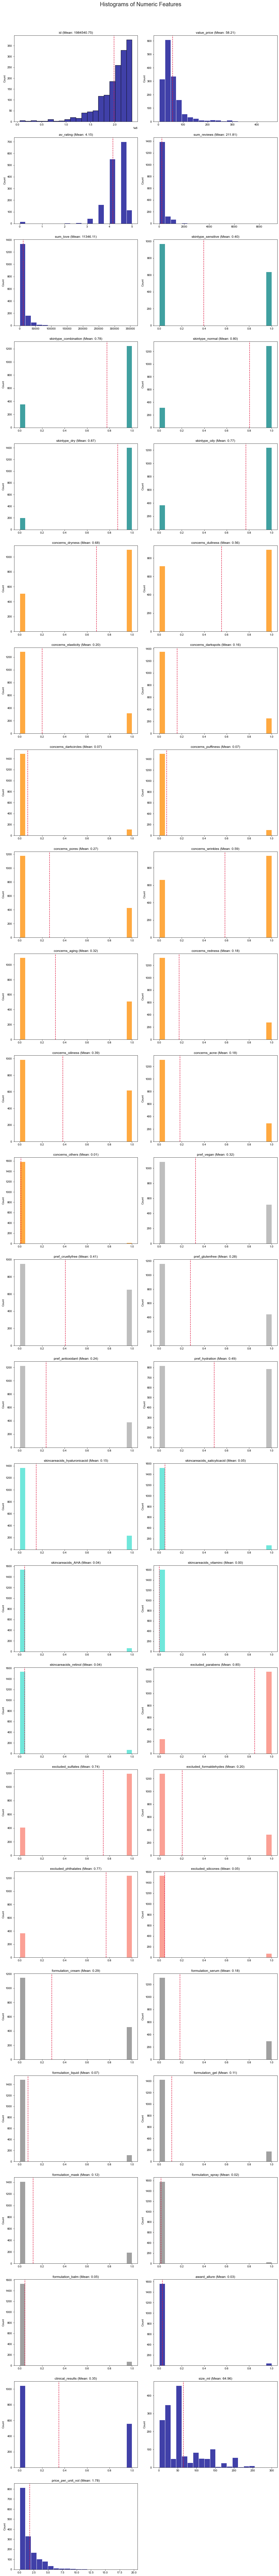

In [10]:
# Display plot
plot_histograms(df, num_features, num_features, sharex=False, sharey=False, kde=False)

# Save plot
plt.savefig('../plots/histograms.png', dpi=150, bbox_inches='tight')

Based on the distributions of the numeric features, there are several features that are right-skewed; most notably for 'value_price', 'size_ml', 'price_per_unit_vol', 'sum_reviews' and 'sum_love'. 

On the other hand, the 'avg_rating' is left-skewed with the the mean rating at about 4. The mean price of a product is around $58 with a higher proportion of products costing less than the mean. The average size of a product is approximately 65 ml.

## 2.4. Scatterplots of Numeric Features vs Price Per Unit Volume / Price

In [11]:
# Create function for plotting scatter plots of numeric features vs 'price_per_unit_vol'/ 'value_price'
def plot_scatterplots(dataframe, target, list_of_columns, list_of_titles, sharey=True):    
    ncols = 2
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*5), sharey=sharey)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        sns.regplot(data=dataframe, x=column, y=target, ax=ax[i], ci=None, color='darkorange', line_kws={'color': 'blue'})
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel(target, fontsize=10)
        ax[i].tick_params(labelsize=10)
        plt.tight_layout()
    
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 
# source: https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot#%20to%20remove%20last%20plot        
    
    plt.suptitle(f'Scatterplots of Numeric Features vs {target.capitalize()}', fontsize=20, y =1.01)

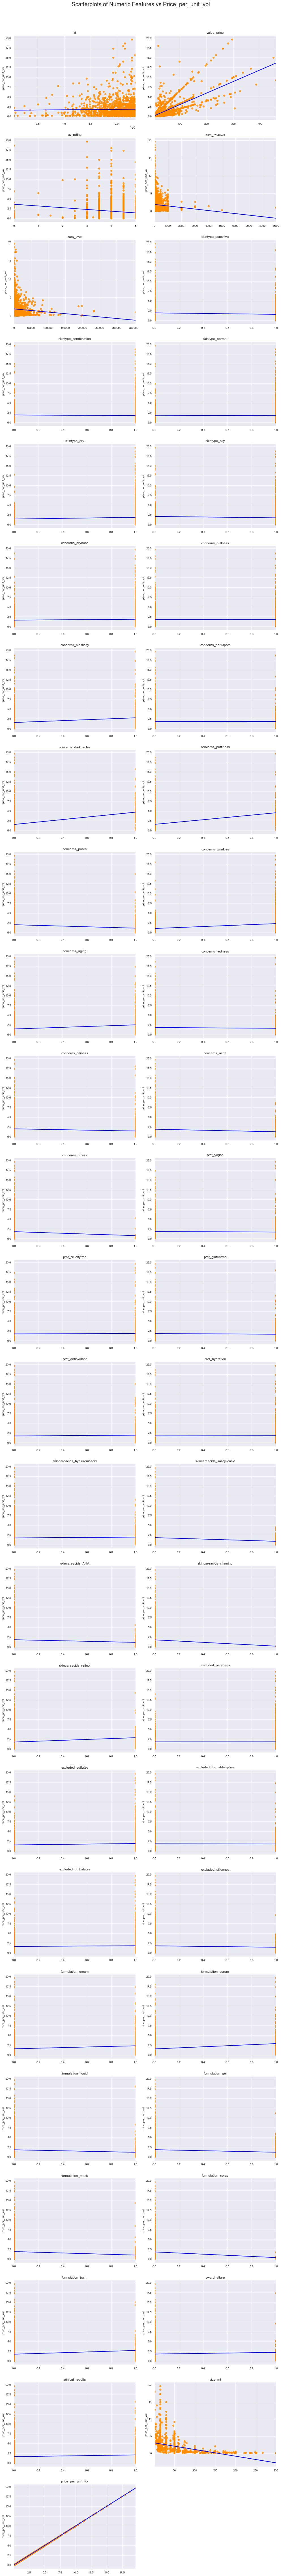

In [12]:
# Display plot
plot_scatterplots(df, 'price_per_unit_vol', num_features, num_features, sharey=False)

# Save plot
plt.savefig('../plots/scatterplots_price_per_unit_vol.png', dpi=150, bbox_inches='tight')

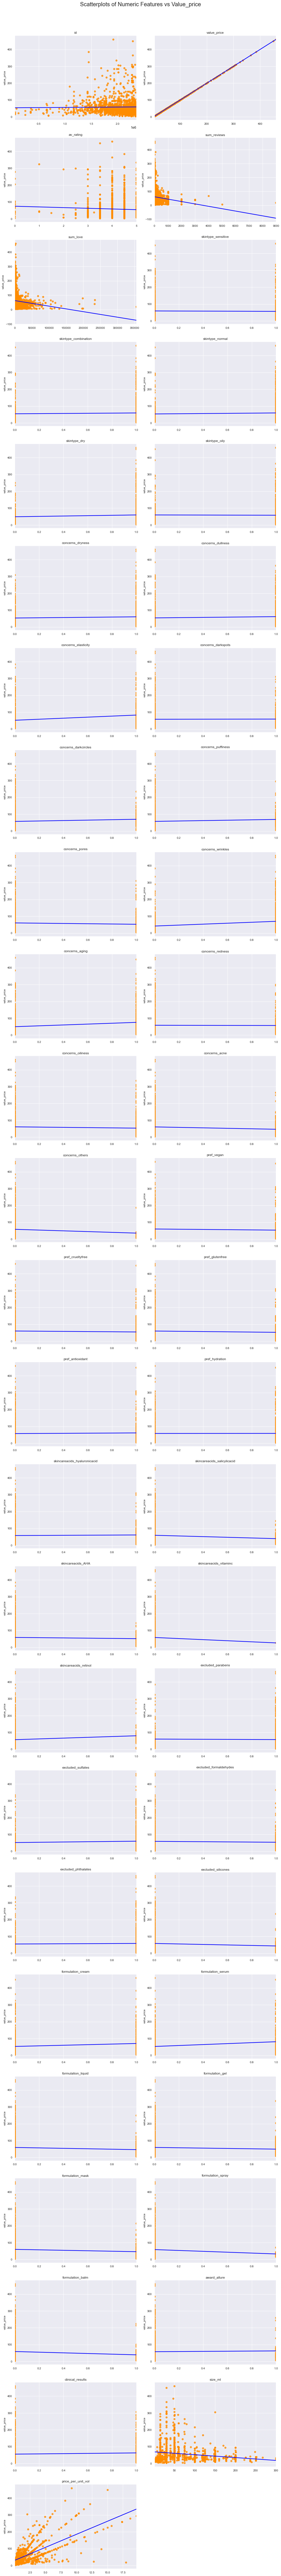

In [13]:
# Display plot
plot_scatterplots(df, 'value_price', num_features, num_features, sharey=False)

# Save plot
plt.savefig('../plots/scatterplots_price.png', dpi=150, bbox_inches='tight')

Looking at the relationship between size of product (as indicated by 'size_ml') and its price (as indicated by 'value_price'), expensive products typically come in smaller volumes. On the other hand, low-cost products vary in volumes. 

While there are several extreme outliers for 'sum_reviews' and 'sum_love', it is unsurprising that cheaper products garnered more reviews and are more loved.

## 2.5. Boxplots of Categorical Features vs Price Per Unit Volume / Price

In [14]:
# Create function for plotting boxplots of categorical features vs 'price_per_unit_vol'/'value_price'
def plot_boxplots(dataframe, target, list_of_columns, list_of_titles, sharex=False):    
    ncols = 1
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 55), sharex=sharex)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        sns.boxplot(data=dataframe, y=column, x=target, ax=ax[i], orient='h')
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
        plt.tight_layout()
    
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 
# Source: https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot#%20to%20remove%20last%20plot        

    plt.suptitle(f'Boxplots of Categorical Features vs {target.capitalize()}', fontsize=20, y =1.01)

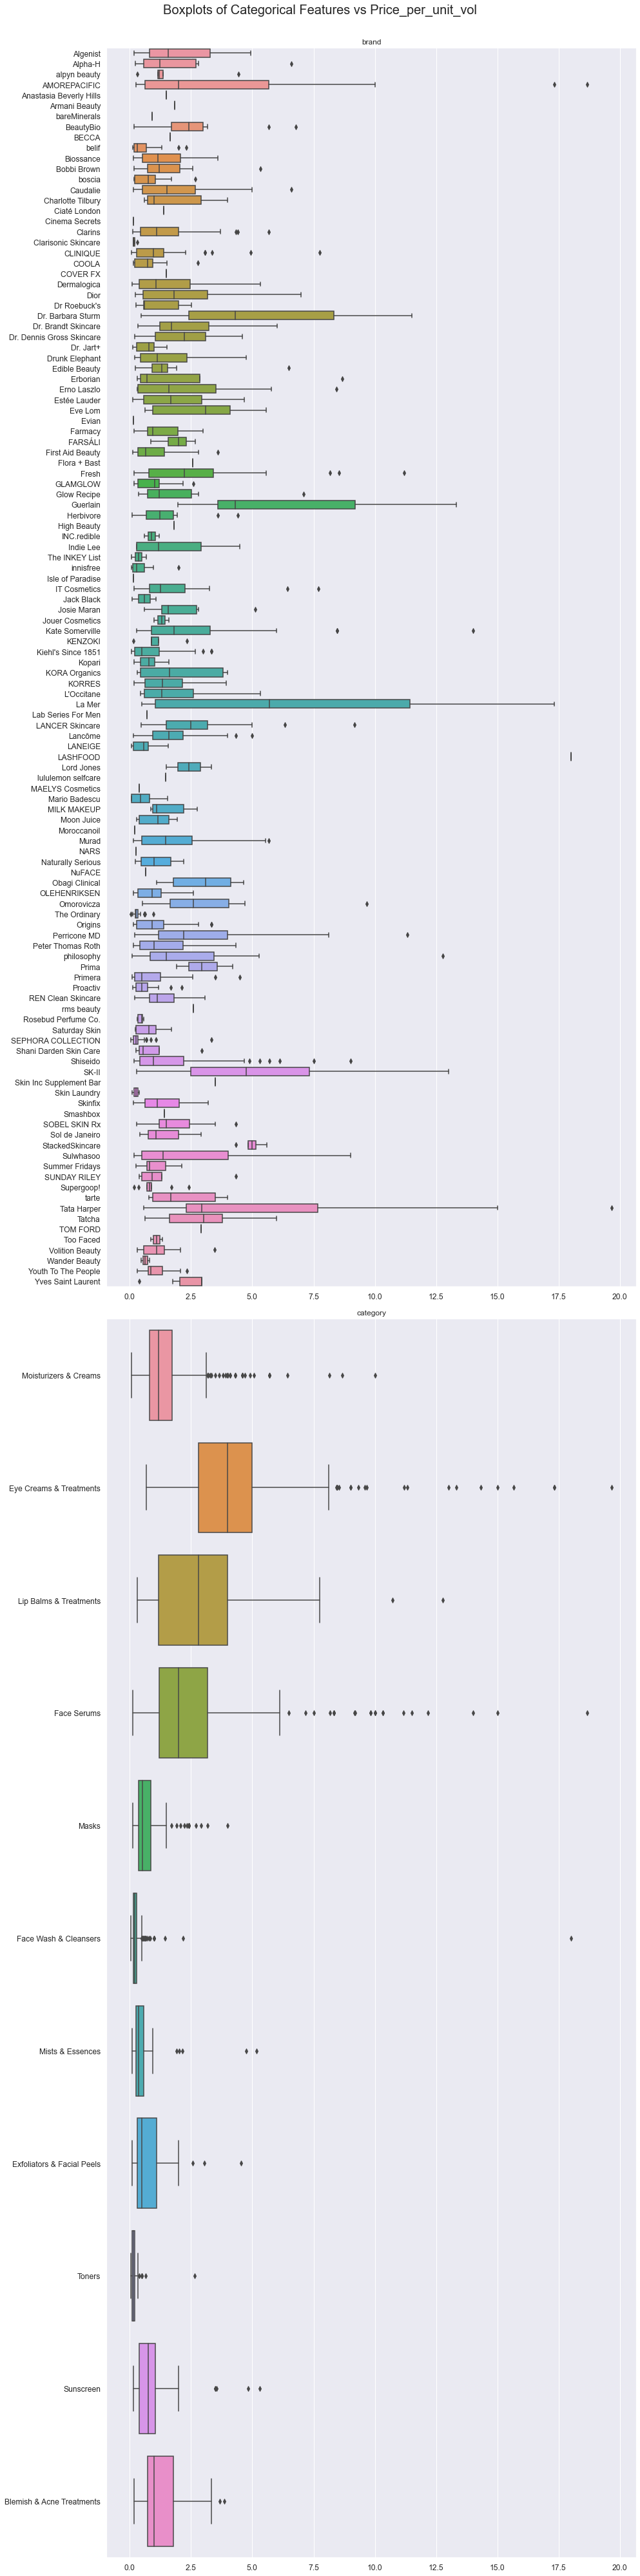

In [15]:
# Display plot
plot_boxplots(df, 'price_per_unit_vol', ['brand','category'], ['brand','category'], sharex=False)

# Save plot
plt.savefig('../plots/boxplots_price_per_unit_vol.png', dpi=150, bbox_inches='tight')

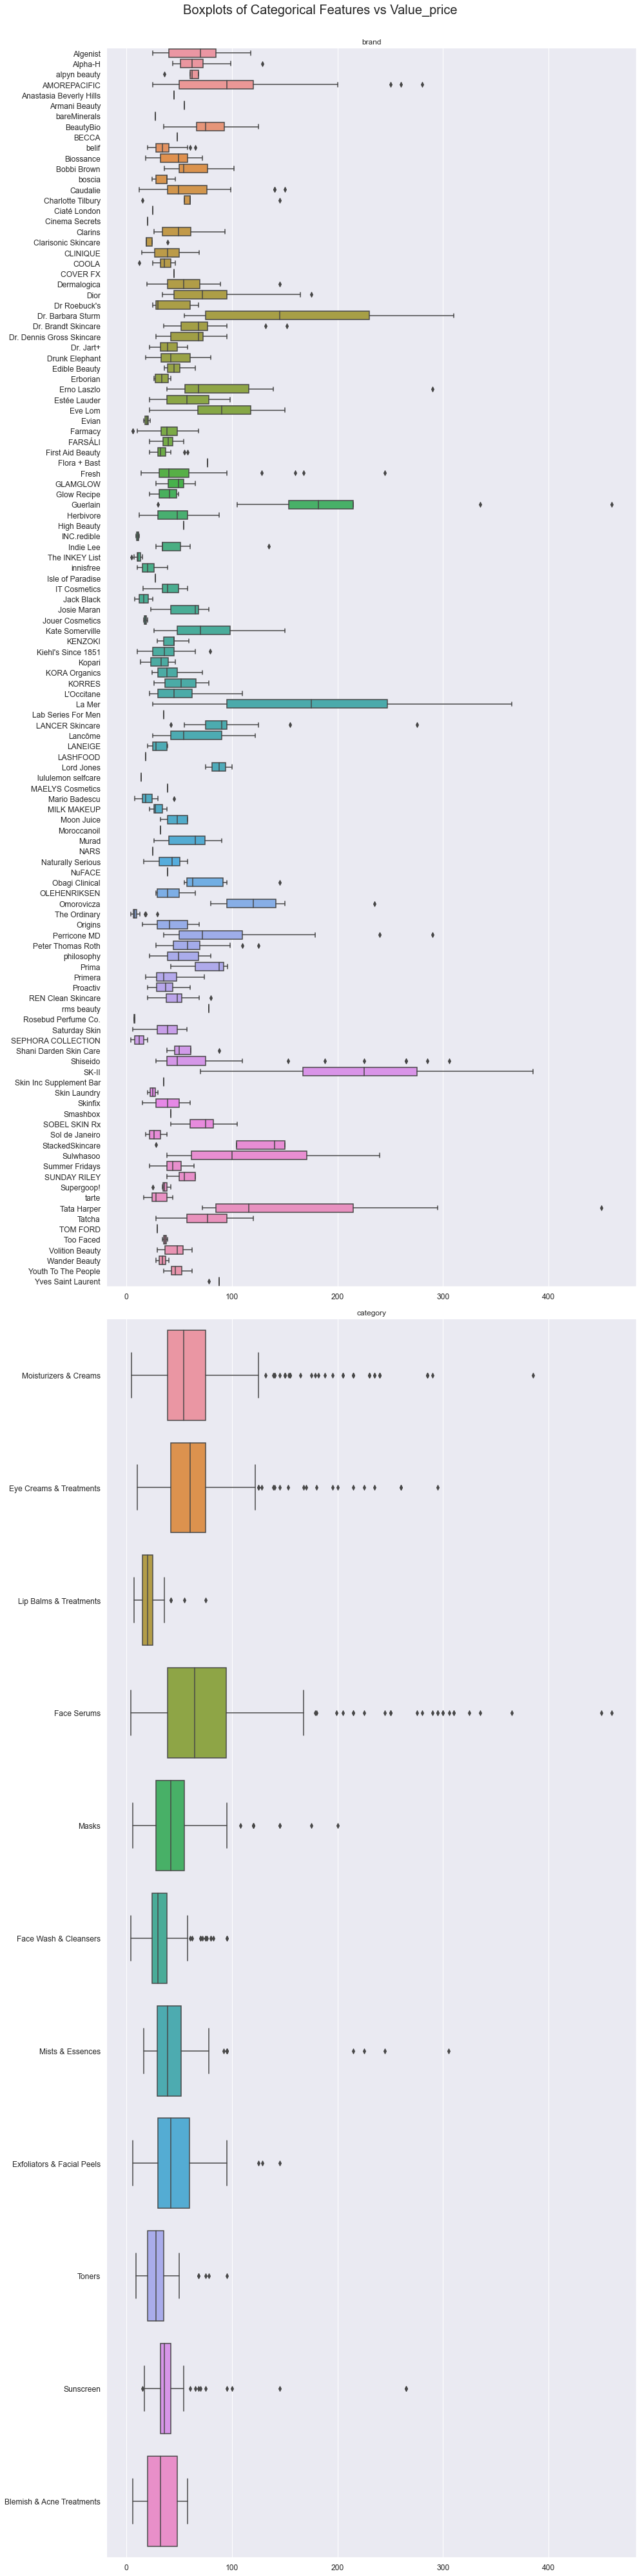

In [16]:
# Display plot
plot_boxplots(df, 'value_price', ['brand','category'], ['brand','category'], sharex=False)

# Save plot
plt.savefig('../plots/boxplots_price.png', dpi=150, bbox_inches='tight')

From the boxplots, some features have a clear relationship with sale price. For example, certain brands have higher median prices than others. For example, SK-II, La Mer, and Guerlain. 

In general, face serums, moisturizers & creams and eye creams & treatments have the widest price range and more outliers than the other skincare categories.

## 2.6. Stripplots of Categorical Features vs Price Per Unit Volume / Price

In [17]:
# Create function for plotting swarm plots of categorical features vs 'price_per_unit_vol' / 'value_price'
def plot_stripplots(dataframe, target, list_of_columns, list_of_titles, sharex=False):    
    ncols = 1
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 55), sharex=sharex)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        sns.stripplot(data=dataframe, y=column, x=target, ax=ax[i], orient='h')
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
        plt.tight_layout()
    
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 
# source: https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot#%20to%20remove%20last%20plot        

    plt.suptitle(f'Stripplots of Categorical Features vs {target.capitalize()}', fontsize=20, y =1.01)

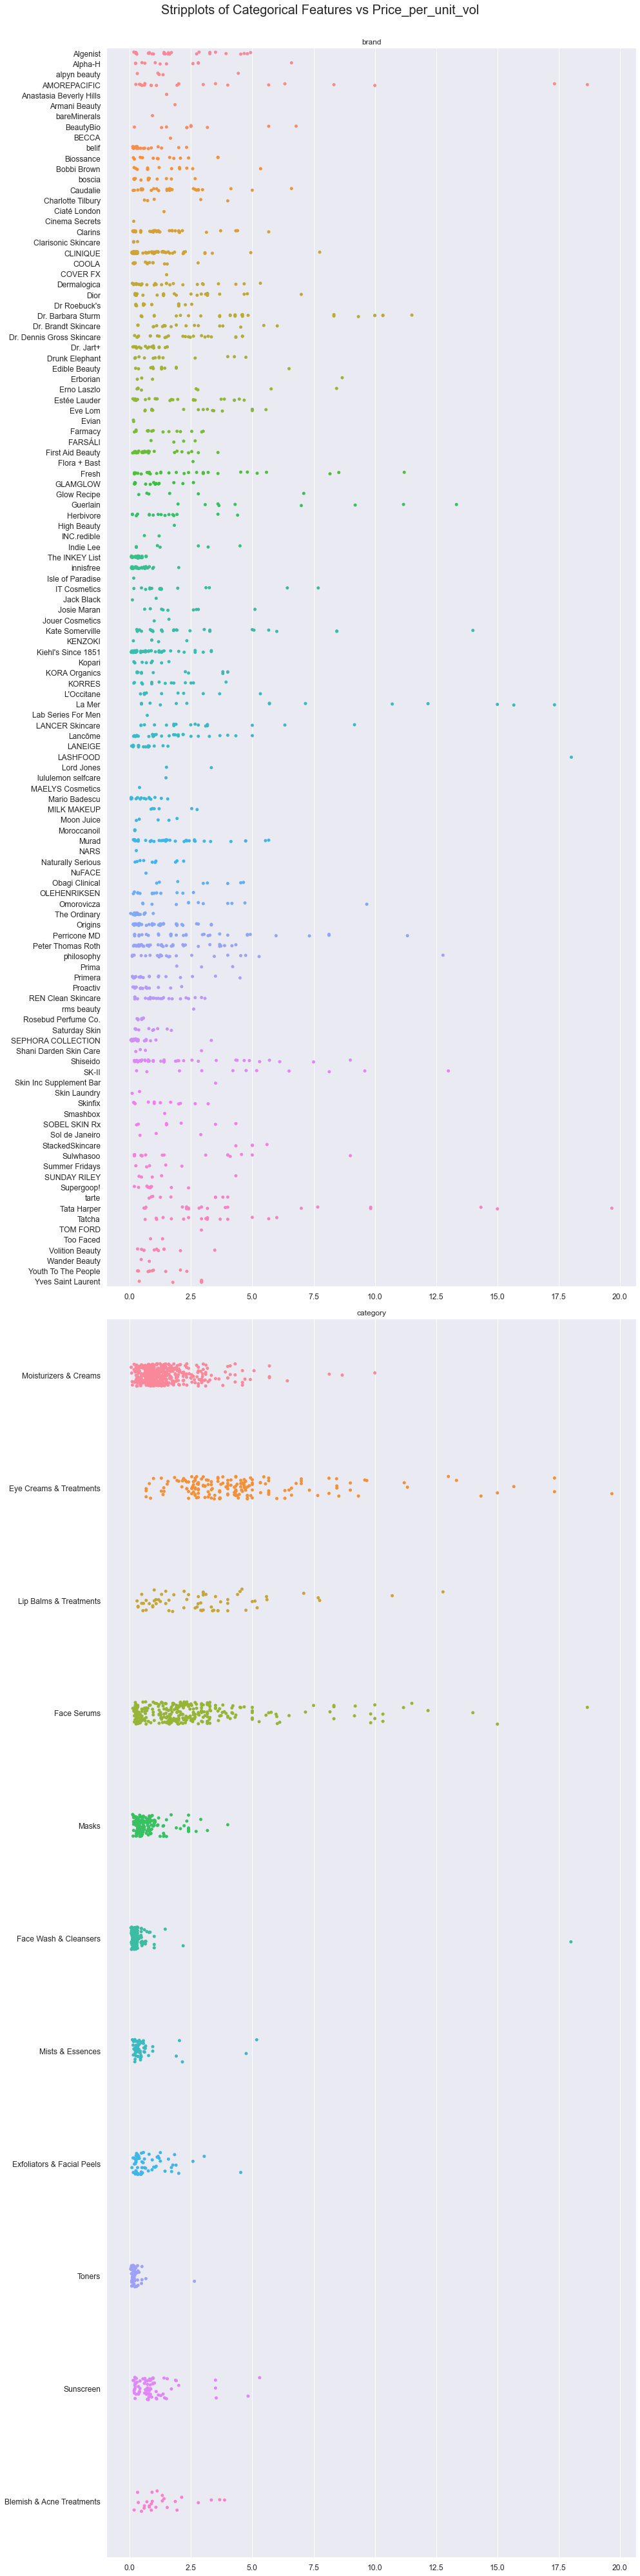

In [18]:
# Display plot
plot_stripplots(df, 'price_per_unit_vol', ['brand','category'], ['brand','category'], sharex=False)

# Save plot
plt.savefig('../plots/stripplots_price_per_unit_vol.png', dpi=150, bbox_inches='tight')

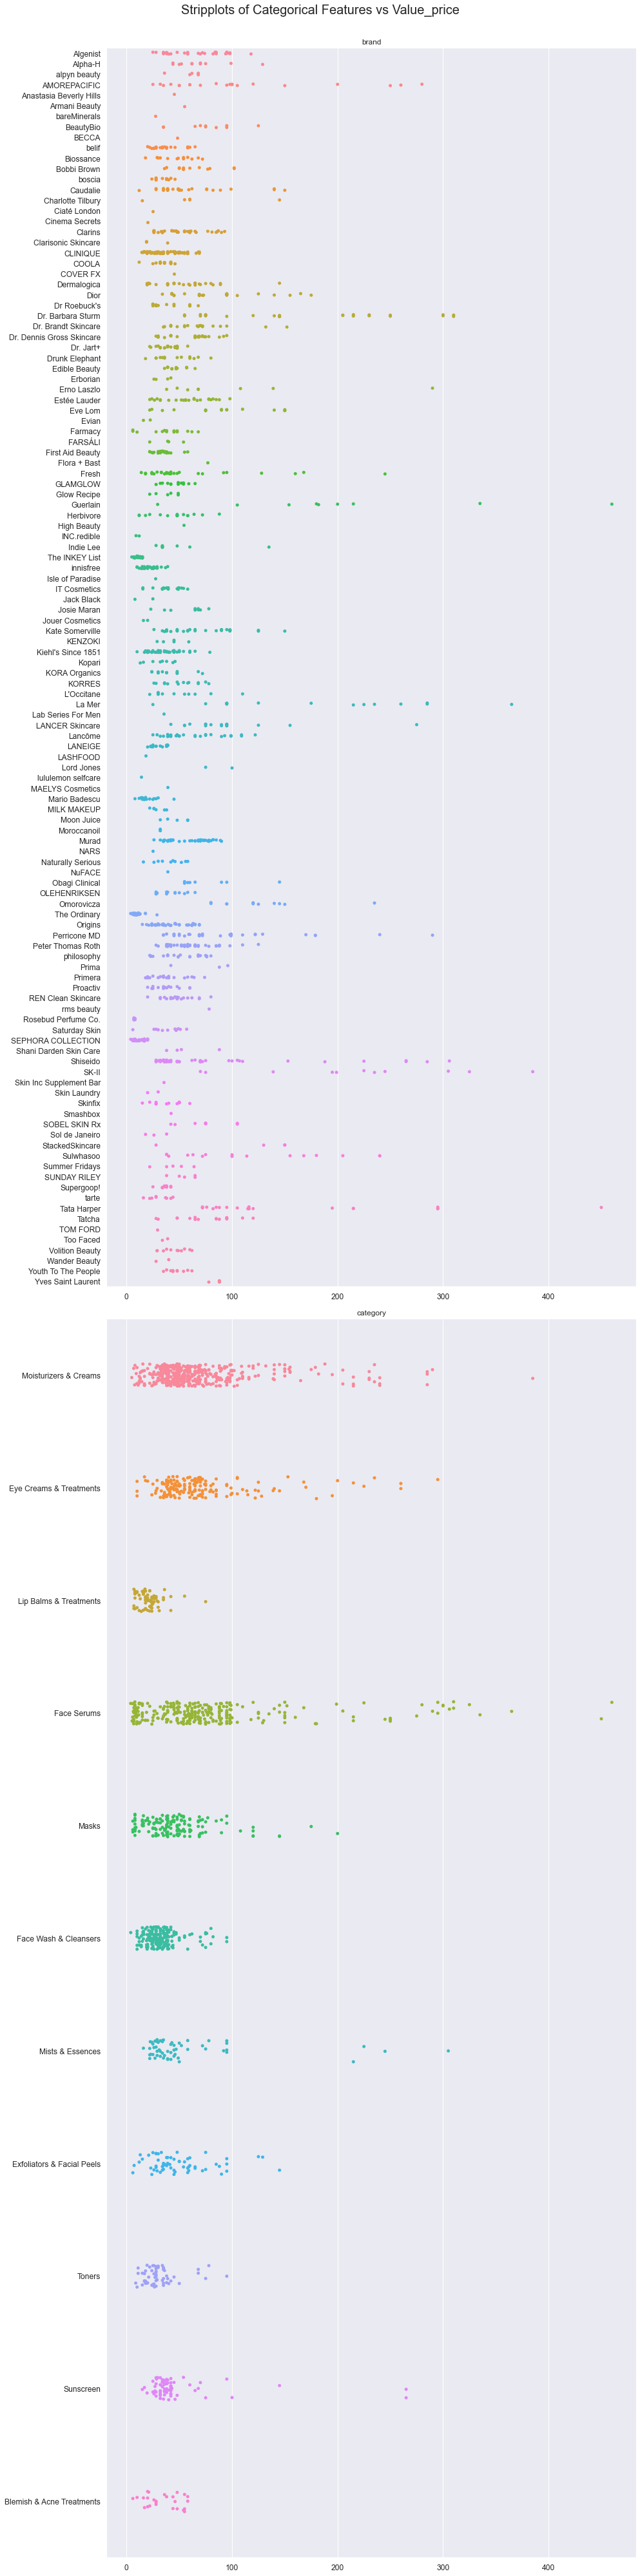

In [19]:
# Display plot
plot_stripplots(df, 'value_price', ['brand','category'], ['brand','category'], sharex=False)

# Save plot
plt.savefig('../plots/stripplots_price.png', dpi=150, bbox_inches='tight')

Strip plots are most useful for showing subsets corresponding to a categorical variable. Based on the strip plots, extreme outliers can be clearly observed in certain brands, like SK-II, La Mer, and Guerlain.

In general, face serums, moisturizers and eye creams & treatments have the widest price range and more outliers than the other skincare categories.

## 2.7. Countplots of Categorical Features (Top 20)

In [20]:
# Create function for plotting countplots of categorical features
def plot_countplots(dataframe, list_of_columns, list_of_titles, sharex=False):    
    ncols = 2
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*5), sharex=sharex)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        sns.countplot(data=dataframe, y=column, ax=ax[i], 
                      order=dataframe[column].value_counts()[:20].sort_values(ascending=False).index) 
        ax[i].set_title(list_of_titles[i], fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')

        plt.tight_layout()
    
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 
# source: https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot#%20to%20remove%20last%20plot        

    plt.suptitle('Countplots of Categorical Features', fontsize=20, y=1.01)

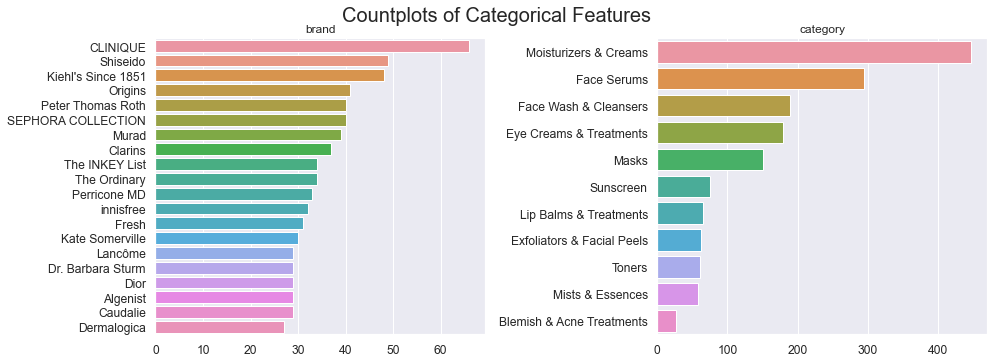

In [21]:
# Display plot
plot_countplots(df, ['brand','category'], ['brand','category'], sharex=False)

# Save plot
plt.savefig('../plots/countplots.png', dpi=150, bbox_inches='tight')

Sephora carries more Clinique skincare products than any other brand. 

In terms of product count, moisturizers & creams topped the skincare category, while more targeted category like blemish & acne treaments have fewer number of products.

In [22]:
# Display number of products per brand
df_brand = df['brand'].value_counts()
df_brand

CLINIQUE                     66
Shiseido                     49
Kiehl's Since 1851           48
Origins                      41
Peter Thomas Roth            40
SEPHORA COLLECTION           40
Murad                        39
Clarins                      37
The INKEY List               34
The Ordinary                 34
Perricone MD                 33
innisfree                    32
Fresh                        31
Kate Somerville              30
Lancôme                      29
Dr. Barbara Sturm            29
Dior                         29
Algenist                     29
Caudalie                     29
Dermalogica                  27
First Aid Beauty             27
REN Clean Skincare           24
Dr. Dennis Gross Skincare    24
Estée Lauder                 24
belif                        23
philosophy                   21
AMOREPACIFIC                 21
Tata Harper                  21
Dr. Jart+                    21
Primera                      20
Dr. Brandt Skincare          19
Mario Ba

In [23]:
# Display number of products per category
df_category = df['category'].value_counts()
df_category

Moisturizers & Creams         447
Face Serums                   294
Face Wash & Cleansers         189
Eye Creams & Treatments       179
Masks                         151
Sunscreen                      75
Lip Balms & Treatments         65
Exfoliators & Facial Peels     62
Toners                         61
Mists & Essences               58
Blemish & Acne Treatments      26
Name: category, dtype: int64

## 2.8. Brands by Average Price Per Unit Volume

In [24]:
# Create function for plotting barplots of numerical features by brand
def plot_barplots_brand(dataframe, col, graph_title):    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    # Plot top 10 
    top10 = dataframe[['brand', col]].groupby(by = 'brand').mean().sort_values(by = col , ascending = False)[:20].sort_values(
        by = col, ascending = True)
    g1 = top10.plot.barh(figsize = (14,10), color='salmon', ax = ax[0], legend = None)
    g1.set_title(f'Average {col.capitalize()} (Top 10)')
    g1.set_xlabel(f'Average {col.capitalize()}')
    
    # Plot bottom 10
    bottom10 = dataframe[['brand', col]].groupby(by = 'brand').mean().sort_values(by = col , ascending = True)[:20].sort_values(
        by = col, ascending = True)
    g2 = bottom10.plot.barh(figsize = (14,10), color='salmon', ax = ax[1], legend = None)
    g2.set_title(f'Average {col.capitalize()} (Bottom 10)')
    g2.set_xlabel(f'Average {col.capitalize()}')
    plt.suptitle(graph_title, fontsize=20, y =1.01)
    plt.tight_layout()
    plt.show()
    
    # Print full dataset
    print(df[['brand', col]].groupby(by = 'brand').mean().sort_values(by = col, ascending = False))

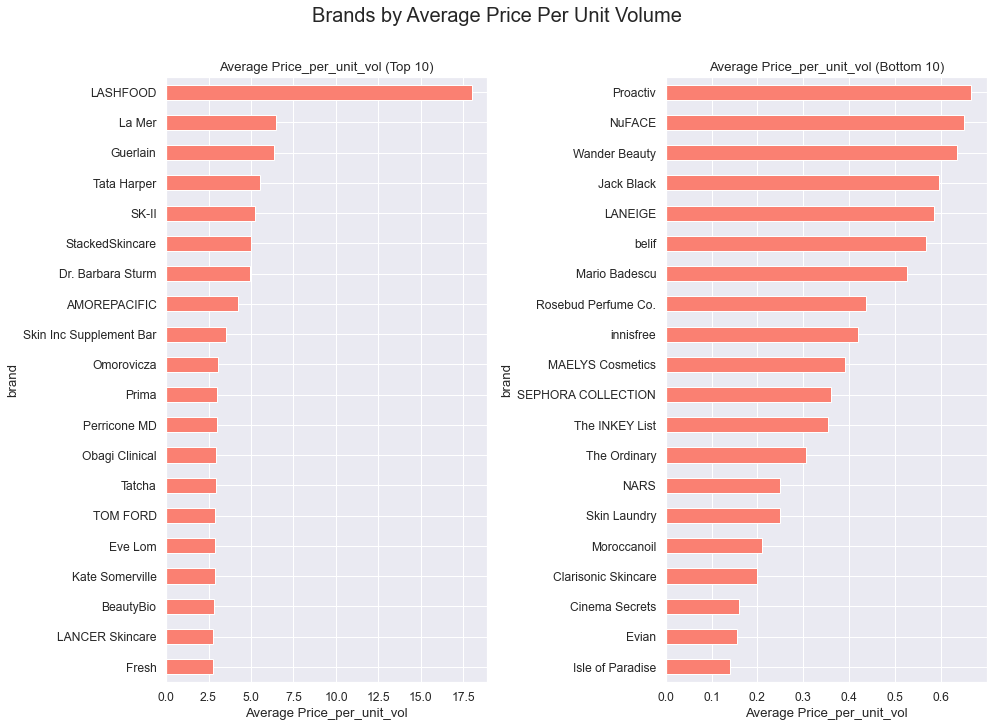

                           price_per_unit_vol
brand                                        
LASHFOOD                            18.000000
La Mer                               6.480000
Guerlain                             6.365556
Tata Harper                          5.520952
SK-II                                5.210909
StackedSkincare                      4.982500
Dr. Barbara Sturm                    4.914483
AMOREPACIFIC                         4.210000
Skin Inc Supplement Bar              3.500000
Omorovicza                           3.085000
Prima                                3.016667
Perricone MD                         2.978485
Obagi Clinical                       2.951250
Tatcha                               2.950625
TOM FORD                             2.900000
Eve Lom                              2.894375
Kate Somerville                      2.864333
BeautyBio                            2.828000
LANCER Skincare                      2.789412
Fresh                             

In [25]:
# Plot 'Brands by Average Price Per Unit Volume'
plot_barplots_brand(df, 'price_per_unit_vol', 'Brands by Average Price Per Unit Volume')

## 2.9. Brands by Average Price 

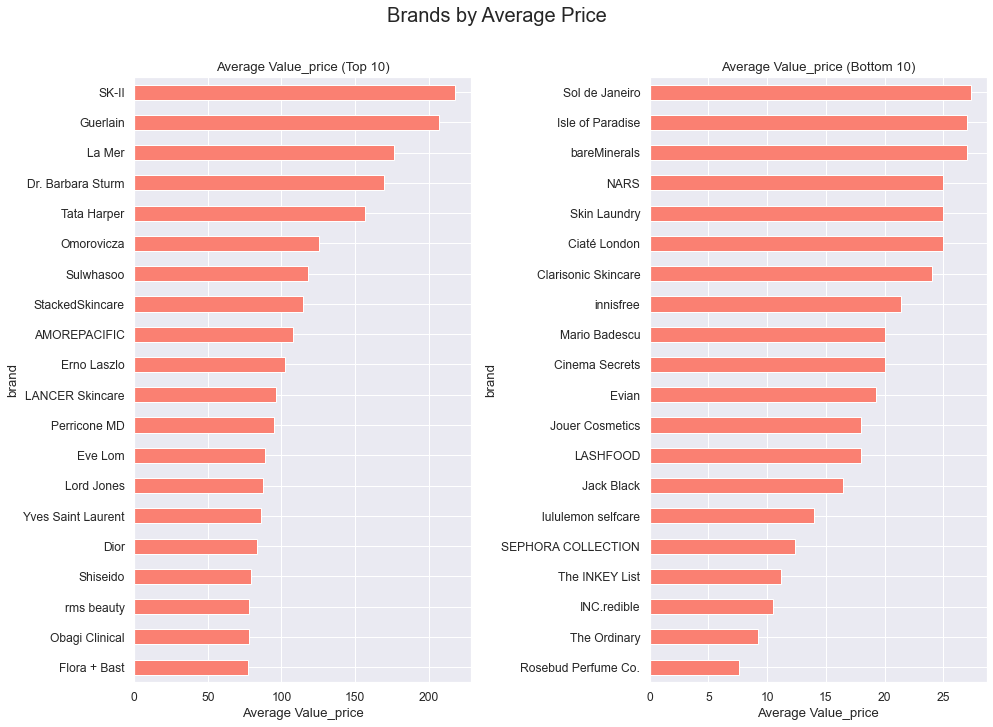

                           value_price
brand                                 
SK-II                       218.000000
Guerlain                    206.722222
La Mer                      176.666667
Dr. Barbara Sturm           170.000000
Tata Harper                 156.666667
Omorovicza                  125.416667
Sulwhasoo                   117.875000
StackedSkincare             114.500000
AMOREPACIFIC                107.952381
Erno Laszlo                 102.125000
LANCER Skincare              96.000000
Perricone MD                 94.727273
Eve Lom                      88.750000
Lord Jones                   87.500000
Yves Saint Laurent           86.333333
Dior                         83.241379
Shiseido                     79.530612
rms beauty                   78.000000
Obagi Clinical               77.875000
Flora + Bast                 77.000000
BeautyBio                    75.500000
Prima                        75.333333
Kate Somerville              74.366667
Tatcha                   

In [26]:
# Plot 'Brands by Average Price'
plot_barplots_brand(df, 'value_price', 'Brands by Average Price')

## 2.10. Brands by Average Product Size 

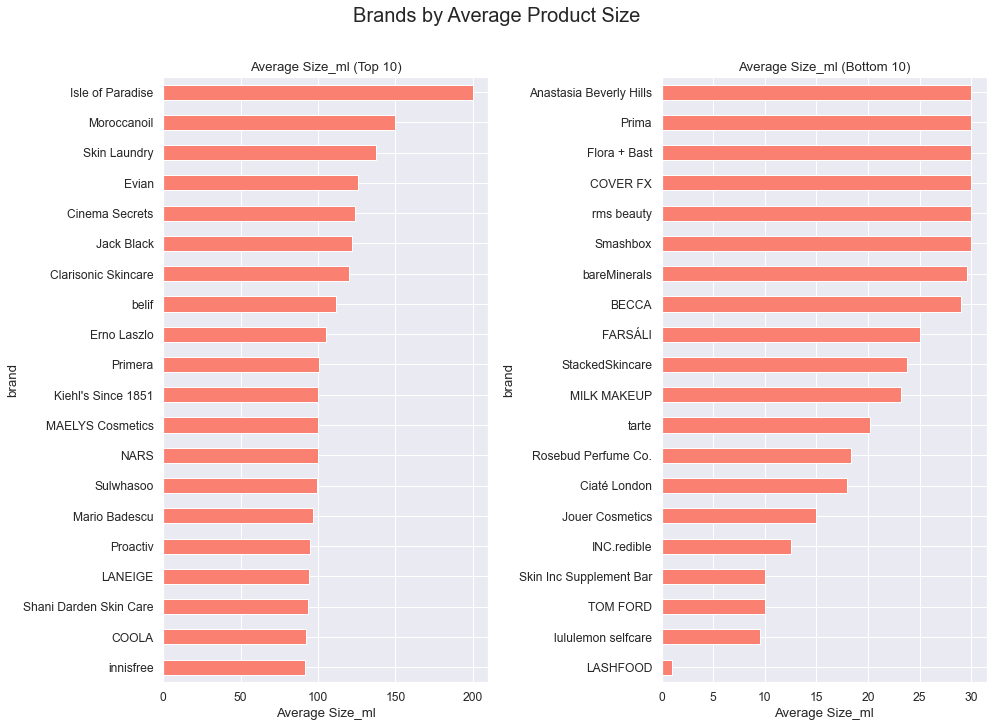

                              size_ml
brand                                
Isle of Paradise           200.000000
Moroccanoil                150.000000
Skin Laundry               137.500000
Evian                      125.700000
Cinema Secrets             124.000000
Jack Black                 121.695000
Clarisonic Skincare        120.000000
belif                      111.712174
Erno Laszlo                105.236250
Primera                    100.800000
Kiehl's Since 1851         100.083333
MAELYS Cosmetics           100.000000
NARS                       100.000000
Sulwhasoo                   99.375000
Mario Badescu               96.563889
Proactiv                    94.684375
LANEIGE                     94.117647
Shani Darden Skin Care      93.750000
COOLA                       92.015333
innisfree                   91.625000
Peter Thomas Roth           81.922250
boscia                      79.685000
GLAMGLOW                    78.214286
SK-II                       77.605455
Dior        

In [27]:
# Plot 'Brands by Average Product Size'
plot_barplots_brand(df, 'size_ml', 'Brands by Average Product Size')

## 2.11. Brands by Average Rating

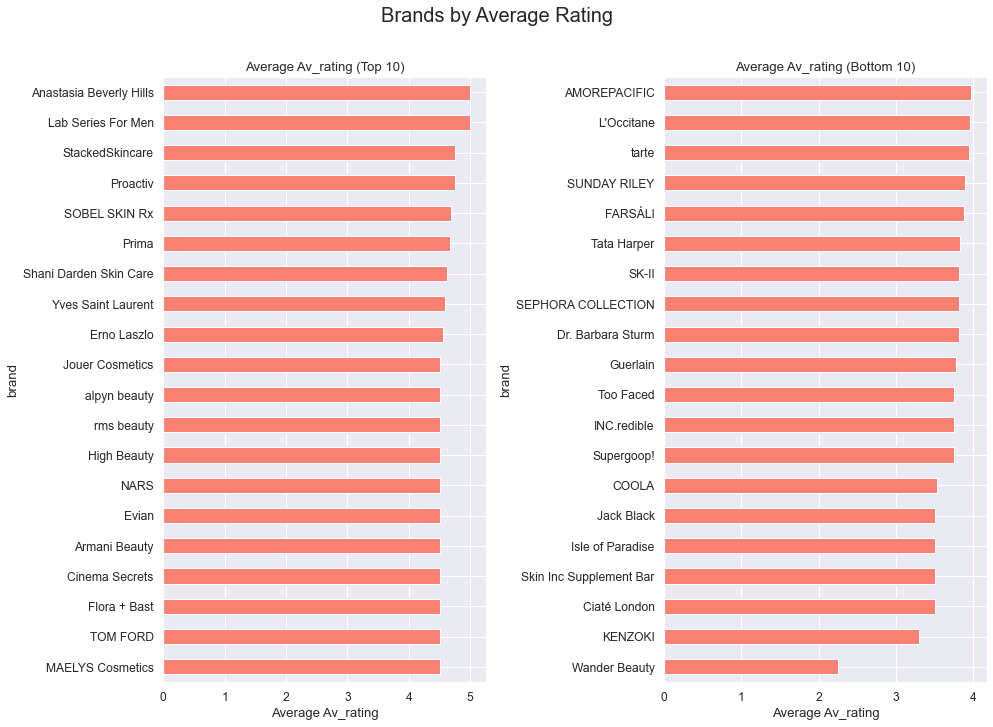

                           av_rating
brand                               
Anastasia Beverly Hills     5.000000
Lab Series For Men          5.000000
StackedSkincare             4.750000
Proactiv                    4.750000
SOBEL SKIN Rx               4.687500
Prima                       4.666667
Shani Darden Skin Care      4.625000
Yves Saint Laurent          4.583333
Erno Laszlo                 4.562500
MAELYS Cosmetics            4.500000
rms beauty                  4.500000
High Beauty                 4.500000
NARS                        4.500000
Evian                       4.500000
Armani Beauty               4.500000
Cinema Secrets              4.500000
Flora + Bast                4.500000
TOM FORD                    4.500000
Jouer Cosmetics             4.500000
alpyn beauty                4.500000
Alpha-H                     4.500000
Lord Jones                  4.500000
innisfree                   4.468750
Edible Beauty               4.458333
Saturday Skin               4.454545
B

In [28]:
# Plot 'Brands by Average Rating'
plot_barplots_brand(df, 'av_rating', 'Brands by Average Rating')

## 2.12. Brands by Average Number of Reviews

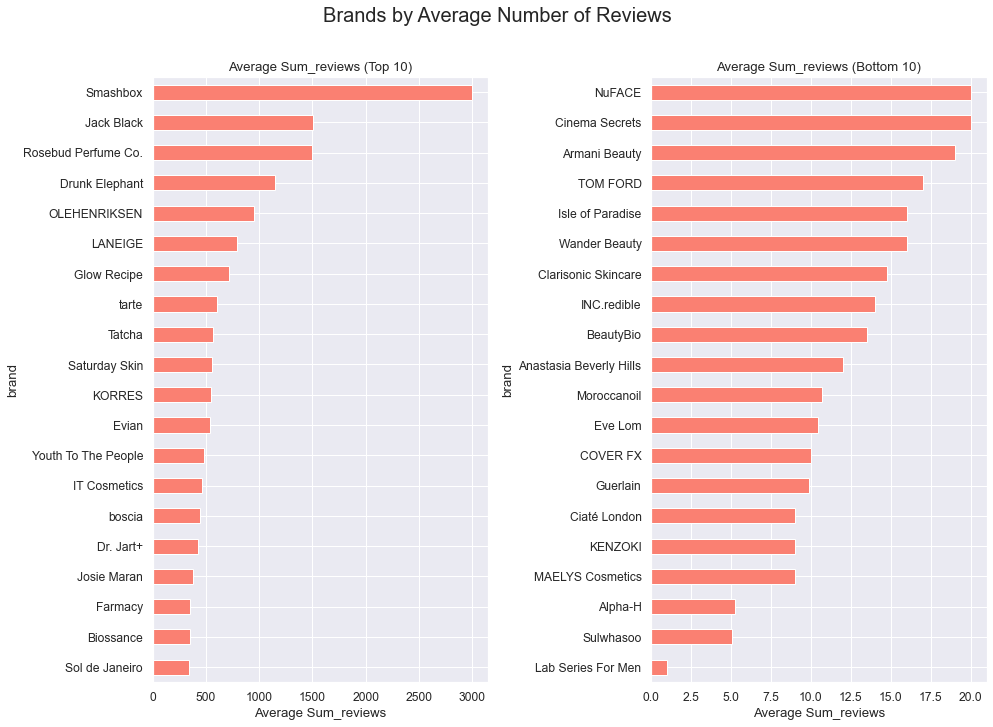

                           sum_reviews
brand                                 
Smashbox                   3000.000000
Jack Black                 1501.500000
Rosebud Perfume Co.        1500.000000
Drunk Elephant             1144.714286
OLEHENRIKSEN                950.384615
LANEIGE                     788.529412
Glow Recipe                 714.000000
tarte                       602.666667
Tatcha                      564.312500
Saturday Skin               557.000000
KORRES                      543.714286
Evian                       539.500000
Youth To The People         480.900000
IT Cosmetics                464.312500
boscia                      445.071429
Dr. Jart+                   424.285714
Josie Maran                 379.222222
Farmacy                     351.937500
Biossance                   350.615385
Sol de Janeiro              339.333333
First Aid Beauty            327.481481
Peter Thomas Roth           324.475000
GLAMGLOW                    320.285714
bareMinerals             

In [29]:
# Plot 'Brands by Average Number of Reviews'
plot_barplots_brand(df, 'sum_reviews', 'Brands by Average Number of Reviews')

## 2.13. Brands by Average Number of Loves

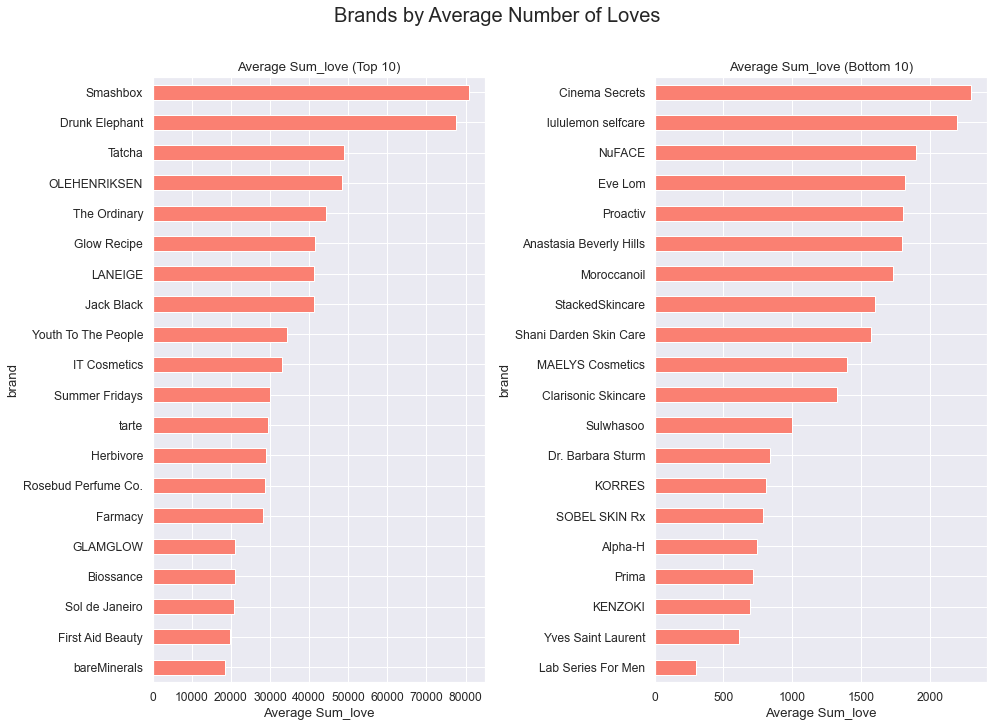

                               sum_love
brand                                  
Smashbox                   80800.000000
Drunk Elephant             77542.857143
Tatcha                     48906.250000
OLEHENRIKSEN               48523.076923
The Ordinary               44417.647059
Glow Recipe                41500.000000
LANEIGE                    41323.529412
Jack Black                 41305.500000
Youth To The People        34480.000000
IT Cosmetics               33025.250000
Summer Fridays             30000.000000
tarte                      29433.333333
Herbivore                  28993.750000
Rosebud Perfume Co.        28842.857143
Farmacy                    28306.250000
GLAMGLOW                   21071.428571
Biossance                  21046.153846
Sol de Janeiro             20700.000000
First Aid Beauty           19729.629630
bareMinerals               18400.000000
boscia                     18110.500000
SUNDAY RILEY               15860.000000
Caudalie                   15713.793103


In [30]:
# Plot 'Brands by Average Number of Loves'
plot_barplots_brand(df, 'sum_love', 'Brands by Average Number of Loves')

## 2.14. Brands by Number of Products for Various Skintypes

In [31]:
# Create function for plotting barplots of feature groups by brands
def plot_barplots_feature_grp(dataframe, list_of_columns, feature_grp, sharex=True):    
    ncols = 2
    nrows = int(np.ceil(len(list_of_columns)/ncols)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows*8), sharex=sharex)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        feature_group = dataframe[dataframe[column] == 1]['brand'].value_counts()[:10].sort_values()
        feature_group.plot.barh(figsize = (16,12), color='darkorange', ax = ax[i], legend = None)
        ax[i].set_title(list_of_columns[i], fontsize=12)
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')

        plt.tight_layout()
        
# Hide unused plots
    for i in range(nrows * ncols - len(list_of_columns)):
        ax[-i-1].set_visible(False) # Start from -1. 
# source: https://stackoverflow.com/questions/44980658/remove-the-extra-plot-in-the-matplotlib-subplot#%20to%20remove%20last%20plot        

    plt.suptitle(f'Brands by Number of Products for Various {feature_grp}', fontsize=20, y=1.01)

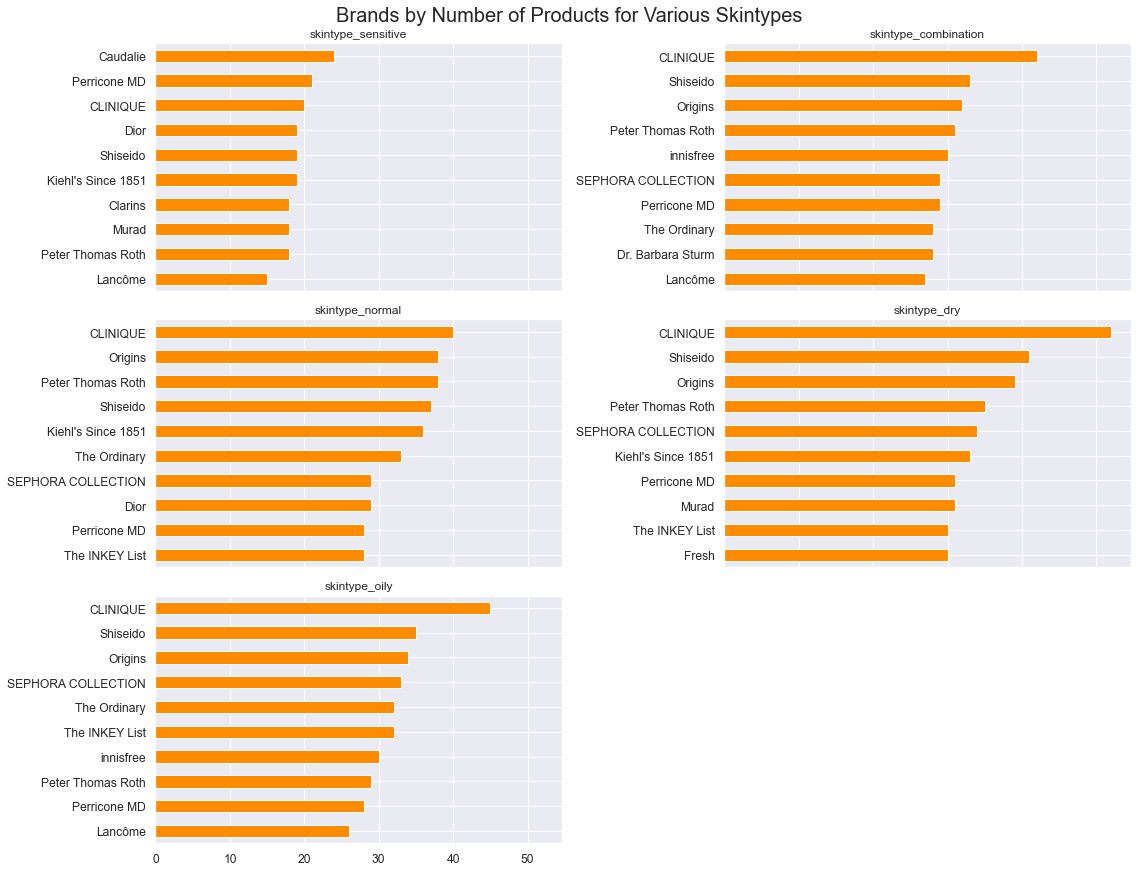

In [32]:
# Plot 'Brands by Number of Products for Various Skintypes'
plot_barplots_feature_grp(df, ['skintype_sensitive', 'skintype_combination', 'skintype_normal', 'skintype_dry', 
                               'skintype_oily'], 'Skintypes', sharex=True)

## 2.15. Brands by Number of Products for Various Concerns

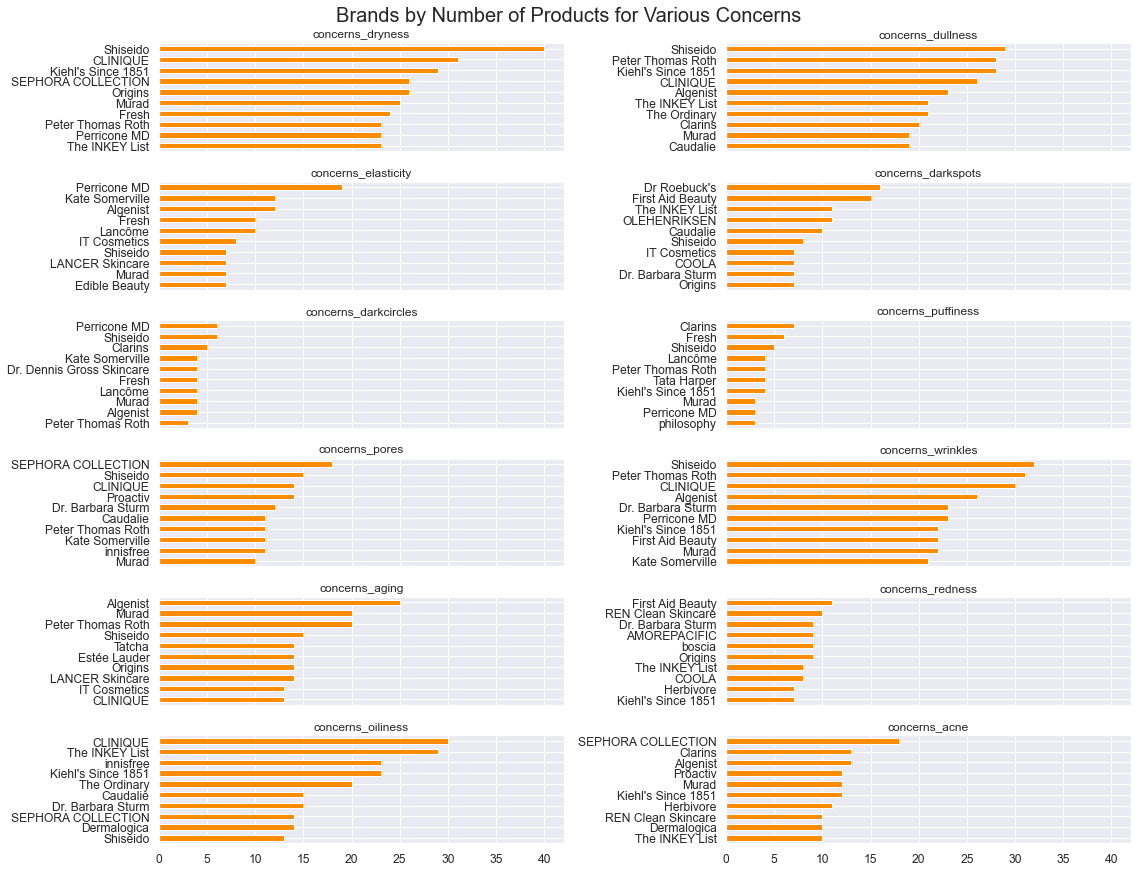

In [33]:
# Plot 'Brands by Number of Products for Various Concerns'
plot_barplots_feature_grp(df, ['concerns_dryness','concerns_dullness', 'concerns_elasticity', 'concerns_darkspots',
                               'concerns_darkcircles', 'concerns_puffiness', 'concerns_pores', 'concerns_wrinkles',
                               'concerns_aging', 'concerns_redness', 'concerns_oiliness', 'concerns_acne'], 
                          'Concerns', sharex=True)

## 2.16. Brands by Number of Products for Various Preferences

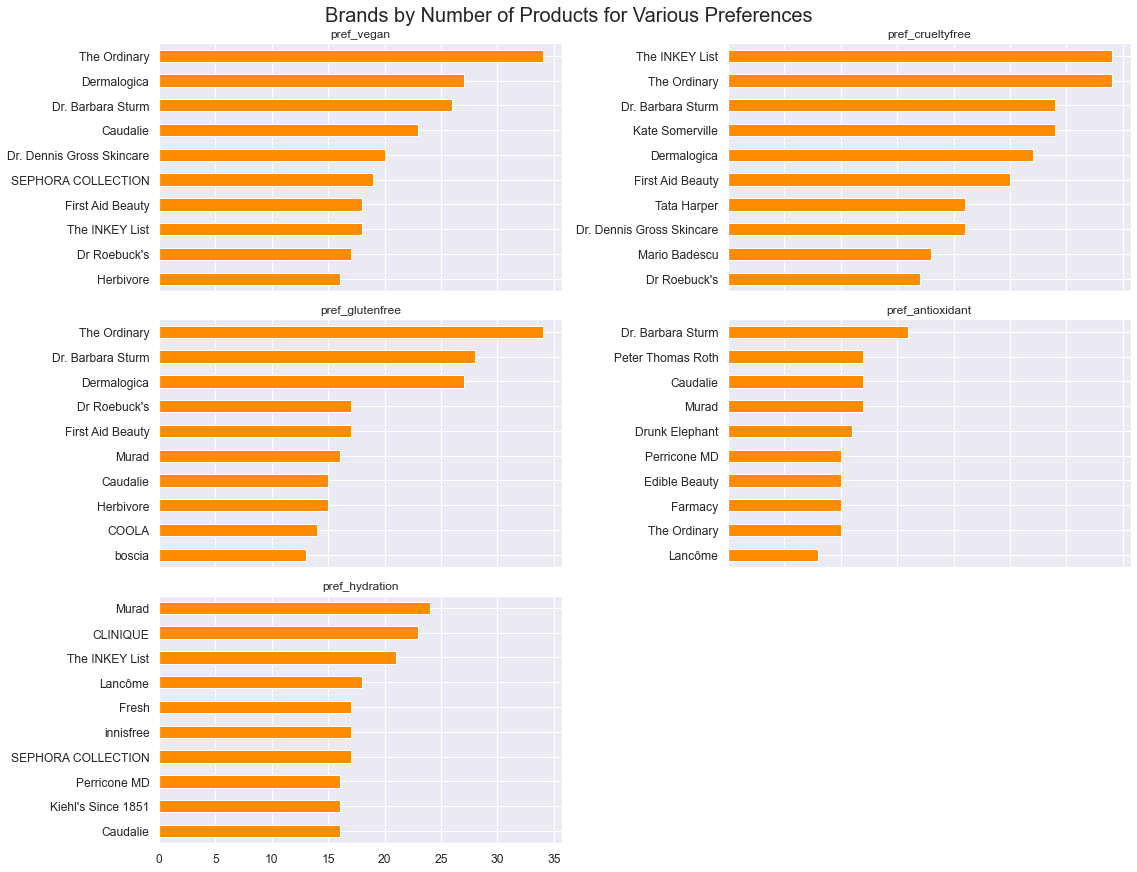

In [34]:
# Plot 'Brands by Number of Products for Various Preferences'
plot_barplots_feature_grp(df, ['pref_vegan', 'pref_crueltyfree','pref_glutenfree', 'pref_antioxidant', 'pref_hydration'],
                          'Preferences', sharex=True)

## 2.17. Brands by Number of Products for Various Skincare Acids

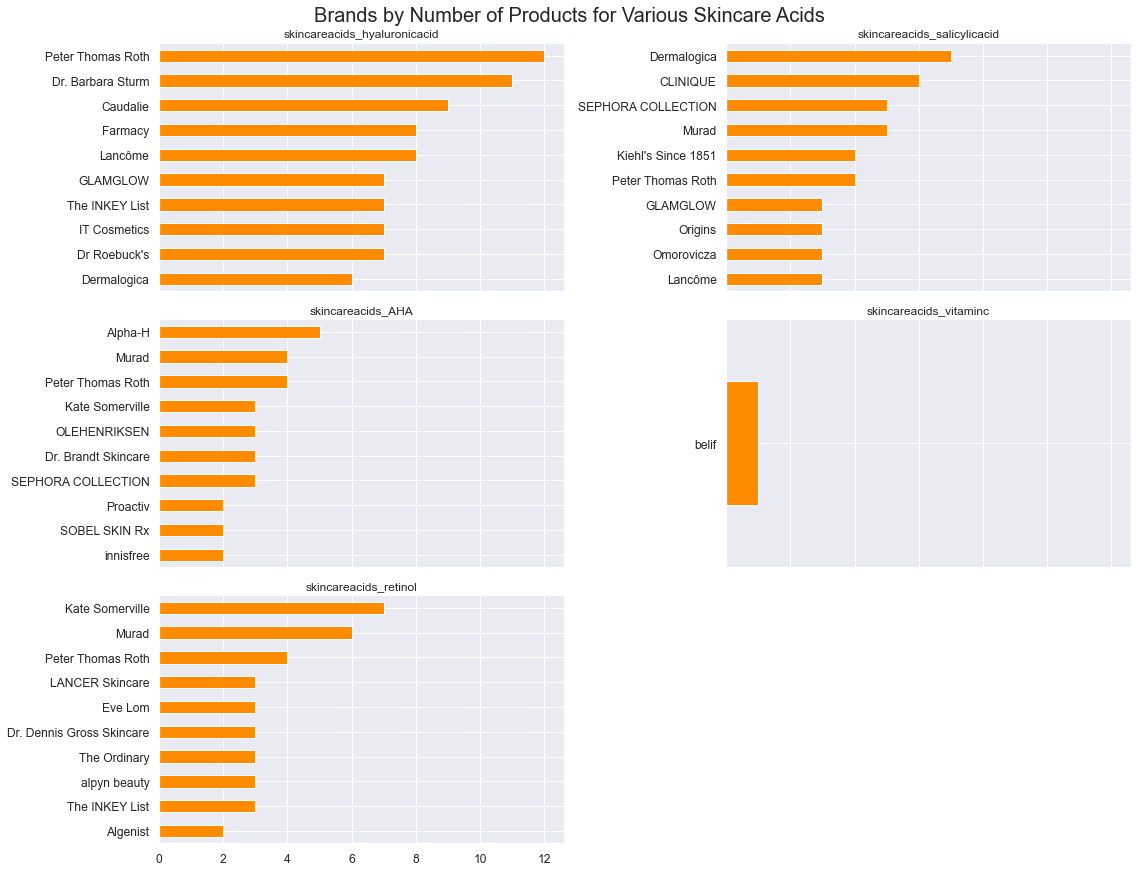

In [35]:
# Plot 'Brands by Number of Products for Various Skincare Acids'
plot_barplots_feature_grp(df, ['skincareacids_hyaluronicacid', 'skincareacids_salicylicacid','skincareacids_AHA', 
                               'skincareacids_vitaminc', 'skincareacids_retinol'], 'Skincare Acids', sharex=True)

## 2.18. Brands by Number of Products for Various Excluded Ingredients

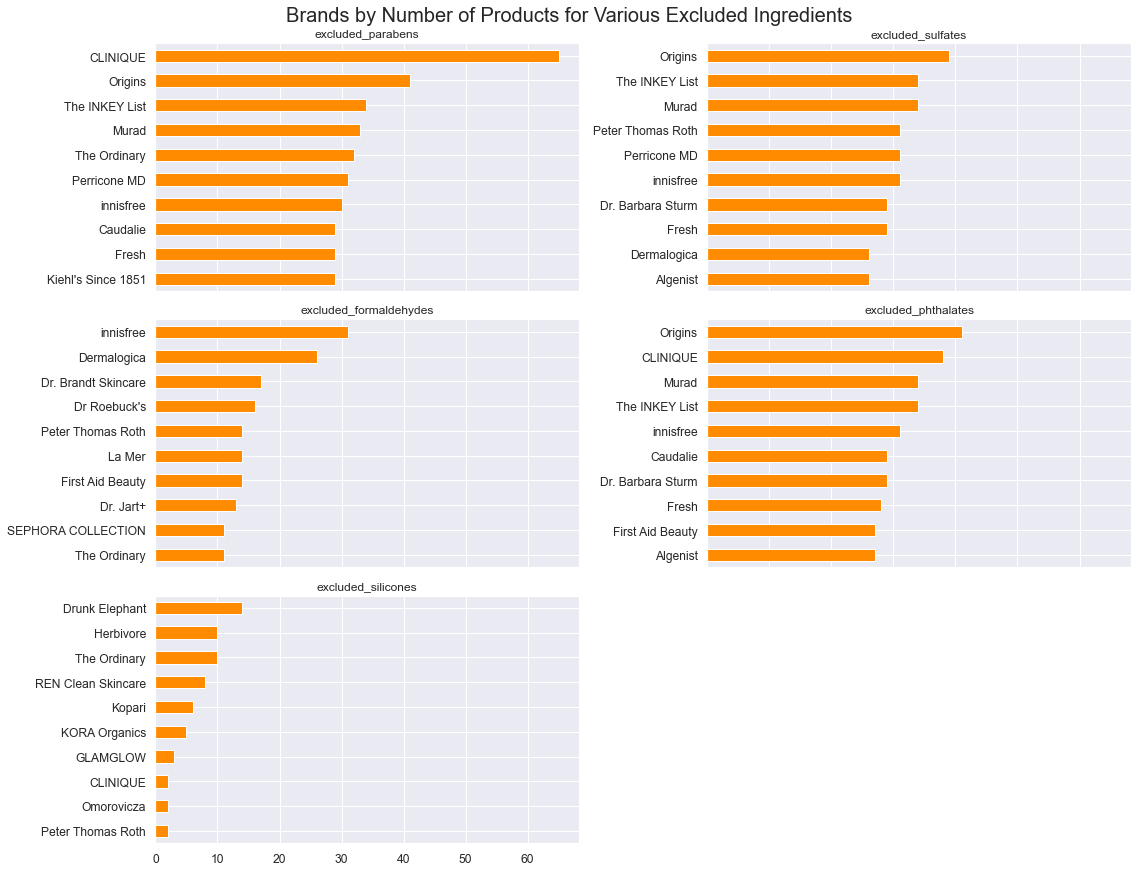

In [36]:
# Plot 'Brands by Number of Products for Various Excluded Ingredients'
plot_barplots_feature_grp(df, ['excluded_parabens', 'excluded_sulfates', 'excluded_formaldehydes','excluded_phthalates',
                               'excluded_silicones'], 'Excluded Ingredients', sharex=True)

## 2.19. Brands by Number of Products for Various Formulation

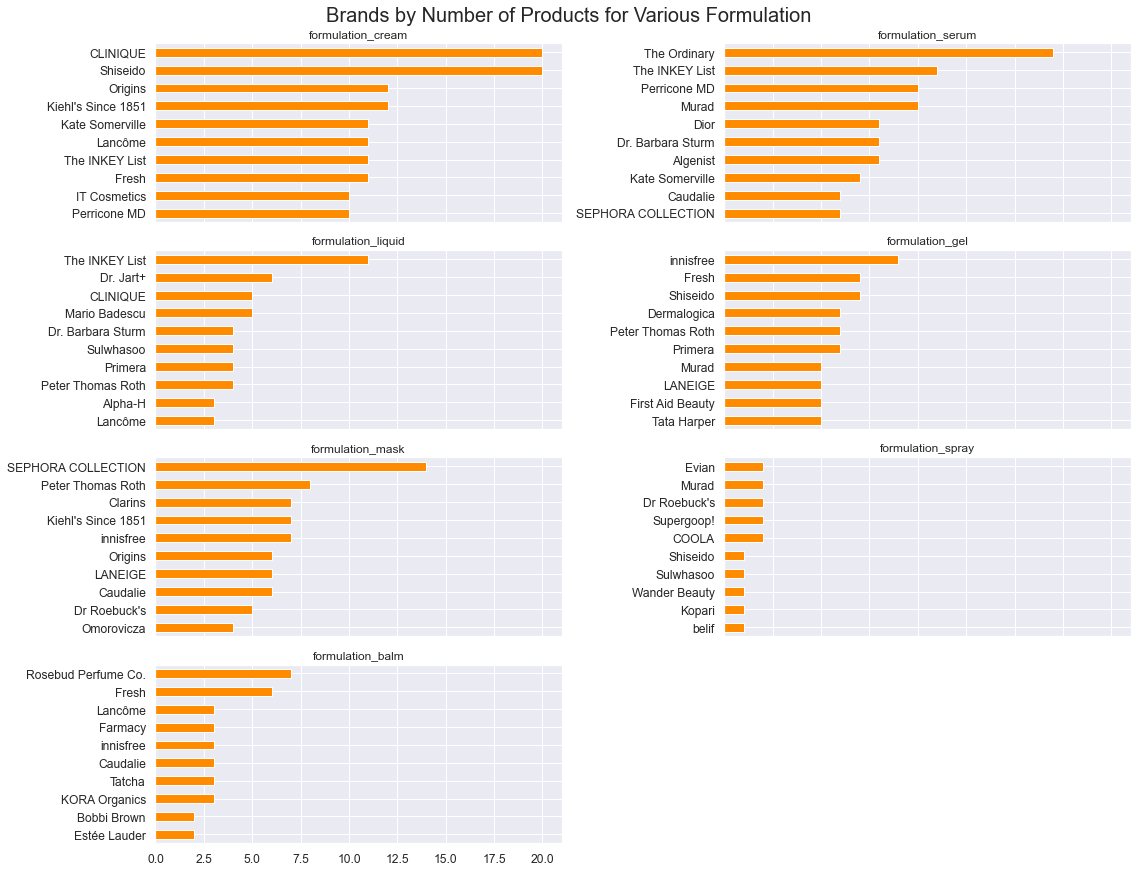

In [37]:
# Plot 'Brands by Number of Products for Various Formulation'
plot_barplots_feature_grp(df, ['formulation_cream','formulation_serum', 'formulation_liquid', 'formulation_gel',
                               'formulation_mask', 'formulation_spray', 'formulation_balm'], 'Formulation', 
                          sharex=True)

## 2.20. Brands by Number of Products for Various Awards or Had Undergone Clinical Trials

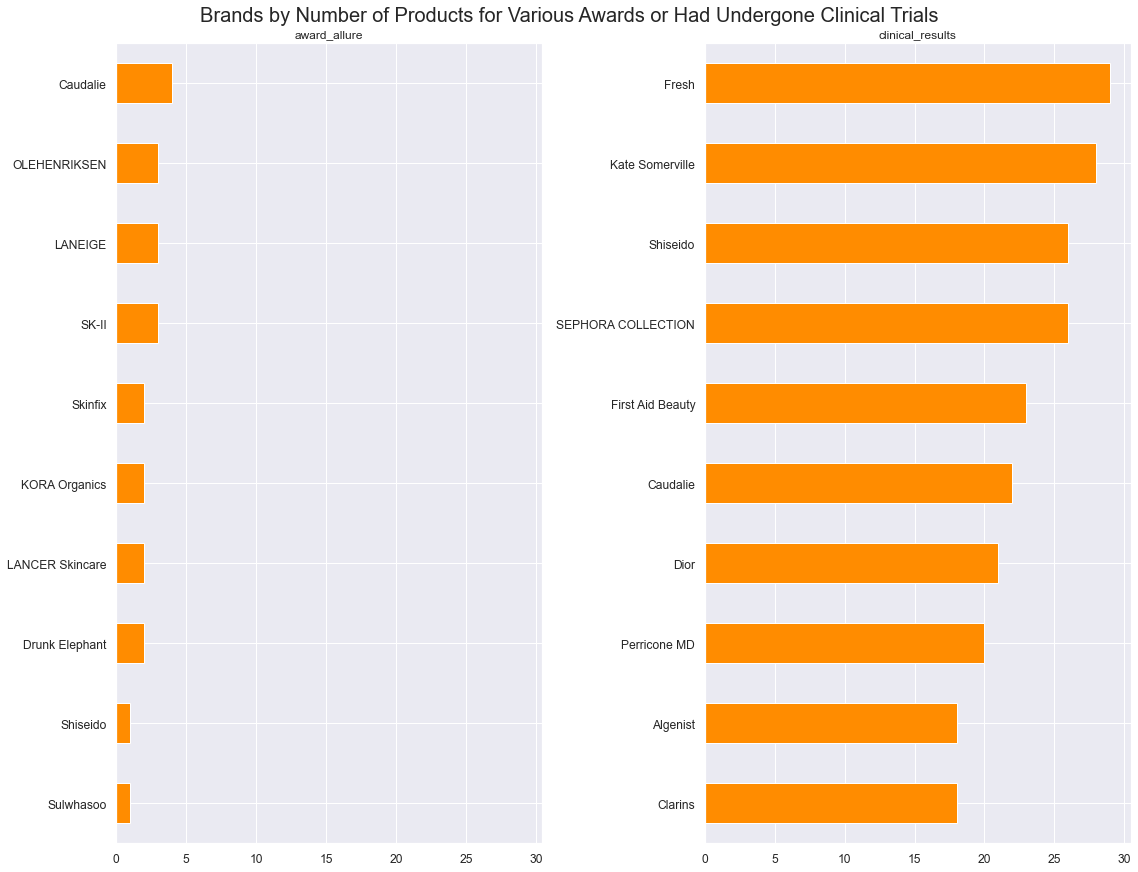

In [38]:
# Plot 'Brands by Number of Products for Various Awards or Had Undergone Clinical Trials'
plot_barplots_feature_grp(df, ['award_allure', 'clinical_results'], 'Awards or Had Undergone Clinical Trials', sharex=True)

## 2.21. Brands by Number of Products

In [39]:
# Create function for plotting barplots of categorical features
def plot_barplots_cat(dataframe, col, graph_title):    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    # Plot top 10 
    top10 = df[col].value_counts()[:10].sort_values()
    g1 = top10.plot.barh(figsize = (14,10), color='teal', ax = ax[0], legend = None)
    g1.set_title(f'{col.capitalize()} by Number of Products (Top 10)')
    g1.set_xlabel(f'{col.capitalize()}')
    
    # Plot bottom 10
    bottom10 = df[col].value_counts().sort_values()[:10]
    g2 = bottom10.plot.barh(figsize = (14,10), color='teal', ax = ax[1], legend = None)
    g2.set_title(f'{col.capitalize()} by Number of Products (Bottom 10)')
    g2.set_xlabel(f'{col.capitalize()}')
    plt.suptitle(graph_title, fontsize=20, y =1.01)
    plt.tight_layout()
    plt.show()
    
    # Print full dataset
    print(df[col].value_counts().sort_values(ascending = False))

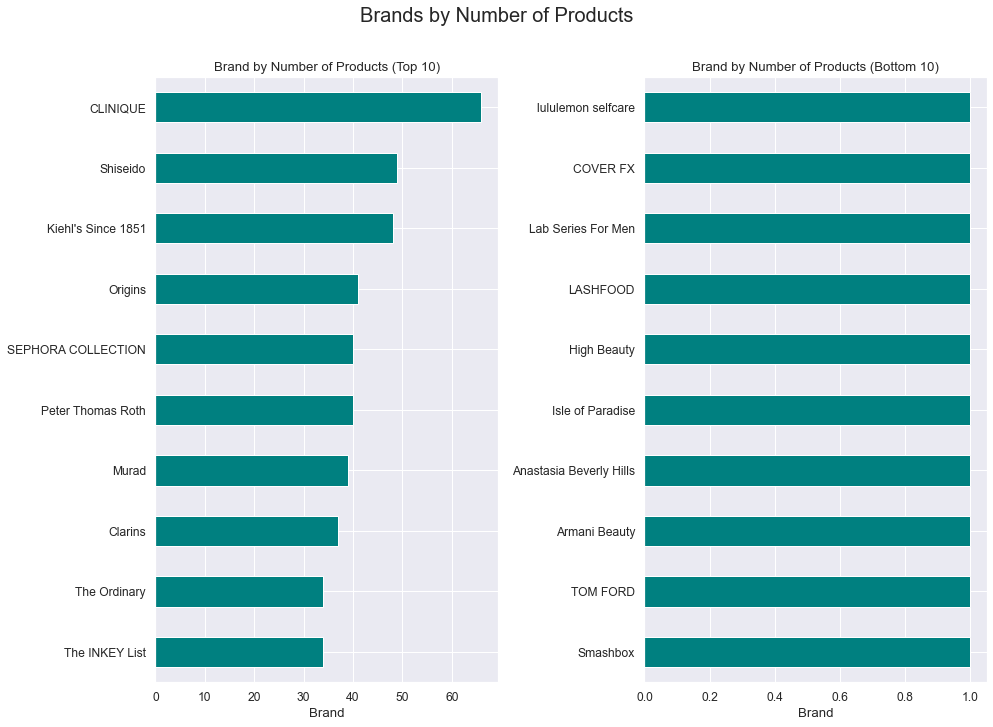

CLINIQUE                     66
Shiseido                     49
Kiehl's Since 1851           48
Origins                      41
Peter Thomas Roth            40
SEPHORA COLLECTION           40
Murad                        39
Clarins                      37
The INKEY List               34
The Ordinary                 34
Perricone MD                 33
innisfree                    32
Fresh                        31
Kate Somerville              30
Dr. Barbara Sturm            29
Dior                         29
Algenist                     29
Caudalie                     29
Lancôme                      29
Dermalogica                  27
First Aid Beauty             27
REN Clean Skincare           24
Dr. Dennis Gross Skincare    24
Estée Lauder                 24
belif                        23
Tata Harper                  21
Dr. Jart+                    21
AMOREPACIFIC                 21
philosophy                   21
Primera                      20
Dr. Brandt Skincare          19
Mario Ba

In [40]:
# Plot 'Brands by Number of Products'
plot_barplots_cat(df, 'brand', 'Brands by Number of Products')

## 2.22. Categories by Number of Products

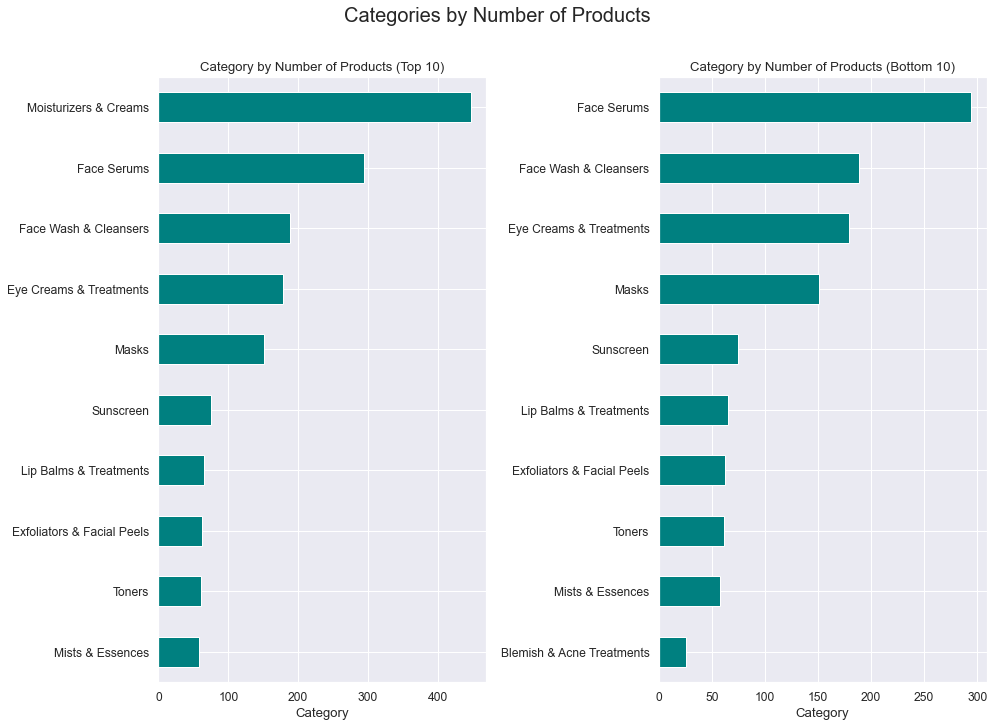

Moisturizers & Creams         447
Face Serums                   294
Face Wash & Cleansers         189
Eye Creams & Treatments       179
Masks                         151
Sunscreen                      75
Lip Balms & Treatments         65
Exfoliators & Facial Peels     62
Toners                         61
Mists & Essences               58
Blemish & Acne Treatments      26
Name: category, dtype: int64


In [41]:
# Plot 'Categories by Number of Products'
plot_barplots_cat(df, 'category', 'Categories by Number of Products')

## 2.23. Correlation Heatmap of Numeric Features

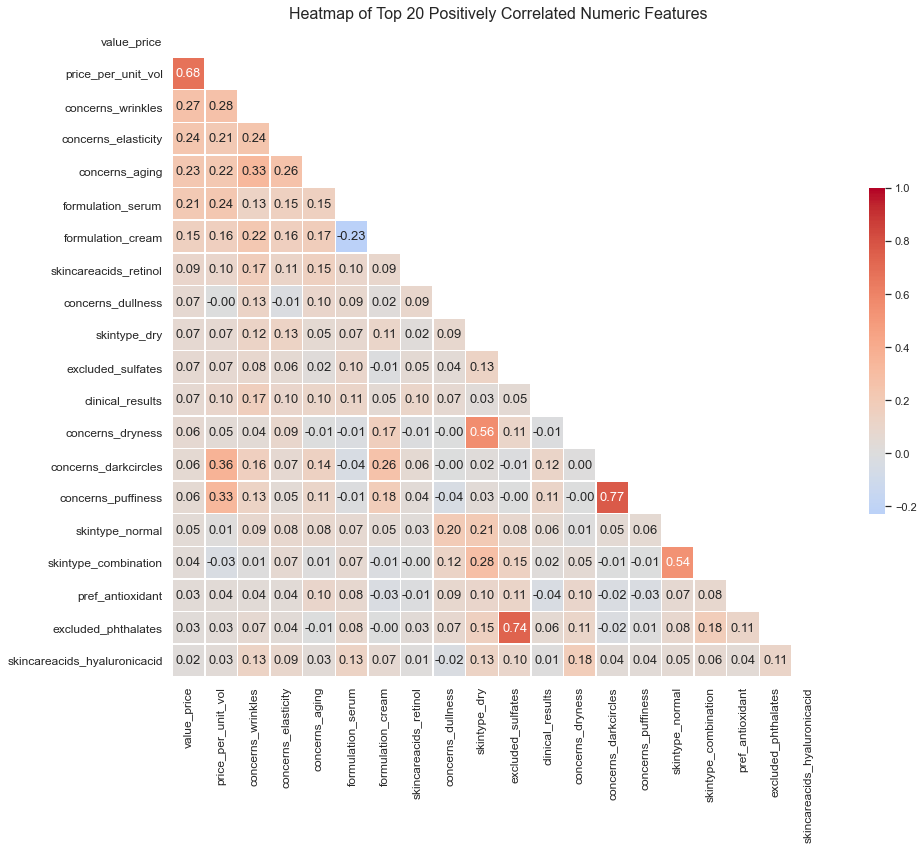

In [42]:
# Set style
sns.set_theme(style='white')

# Correlation matrix for dataset
df_corr = df.corr()

# Create variable for top k positively correlated features
k = 20 # number of variables for heatmap
top_df_corr_features = df_corr.nlargest(k, 'value_price')['value_price'].index

# Compute correlation matrix for top k features
top_df_corr = df[top_df_corr_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(top_df_corr, dtype=bool))

# Set up the matplotlib figure size
plt.figure(figsize=(16,12))

# Draw heatmap with the mask and correct aspect ratio
sns.heatmap(top_df_corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.5, annot =True, fmt='.2f', vmax=1.00, cbar_kws={"shrink": .5}, annot_kws={"size":13})

# Add title and axis labels
plt.title('Heatmap of Top 20 Positively Correlated Numeric Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save plot
plt.savefig('../plots/heatmap_before.png', dpi=150, bbox_inches='tight')

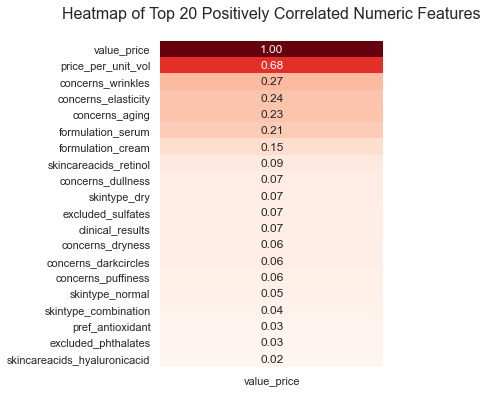

In [43]:
# Check features with strong positive correlation with 'value_price'
plt.figure(figsize=(4,6))

sns.heatmap(df_corr[['value_price']].sort_values(by='value_price', ascending=False).head(20), cmap='Reds', annot=True, fmt='.2f', cbar=False)
plt.title('Heatmap of Top 20 Positively Correlated Numeric Features', fontsize=16, y=1.05)

# Save plot
plt.savefig('../plots/heatmap_top20positive_before.png', dpi=150, bbox_inches='tight')


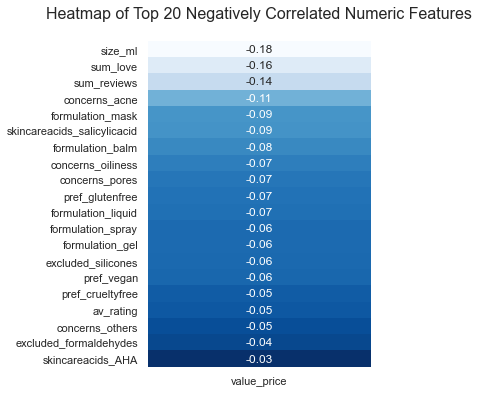

In [44]:
# Check features with strong negative correlation with 'value_price'
plt.figure(figsize=(4,6))
sns.heatmap(df_corr[['value_price']].sort_values(by='value_price').head(20), cmap='Blues', annot=True, fmt='.2f', cbar=False)
plt.title('Heatmap of Top 20 Negatively Correlated Numeric Features', fontsize=16, y=1.05)

# Save plot
plt.savefig('../plots/heatmap_top20negative_before.png', dpi=150, bbox_inches='tight')

# 3. Preprocessing

## 3.1. Encode Categorical (Nominal) Features

Categorical variables (Nominal) comprise a finite set of discrete values. Dummy coding is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories. As we want brands and category to be represented in our models, we will perform dummy encoding on these variables. 

In [45]:
# Apply dummy encoding to categorical (Nominal) features
df['dum_brand'] = df['brand']
df = pd.get_dummies(df, columns = ['brand']).drop('brand_Smashbox', axis = 1)

df['dum_category'] = df['category']
df = pd.get_dummies(df, columns = ['category']).drop('category_Mists & Essences', axis = 1)

In [46]:
# Rename columns
df.rename(columns={'dum_brand': 'brand', 'dum_category': 'category'}, inplace=True)

## 3.2. New Features

Based on the above EDA, we will attempt to discretize the target variable into equal-sized buckets based on quantiles so that we will have a 3-class classification problem.

In [47]:
# Create new category based on quantiles
# Discretize variable into equal-sized buckets based on quantiles
df['price_range'] = pd.qcut(df['value_price'], q=3, labels = ['1', '2', '3'], duplicates ='raise', precision = 3)

# Reference: {'1': 'cheap', '2': 'average', '3': 'expensive'}

In [48]:
# Display the number of products in each 'price_range' bucket
df['price_range'].value_counts()

1    542
3    534
2    531
Name: price_range, dtype: int64

## 3.3. Identify Outliers

Outliers are stragglers — extremely high or extremely low values — in a dataset that can throw off a model because they are not indicative of the actual distribution of data. Outliers can occur for many reasons: typos, incorrect units, or they can be legitimate but extreme values. 

Interquartile Range (IQR) is used to measure variability by dividing a dataset into quartiles. The data is sorted in ascending order and split into 4 equal parts - first, second, third and fourth quartiles (i.e. Q1, Q2, Q3 and Q4). 

Extreme outliers are data points that are more extreme than Q1 - 3 * IQR  or Q3 + 3 * IQR, where IQR is the middle 50% of values when ordered from lowest to highest. 

Text(0.5, 1.0, 'Boxplot of value_price')

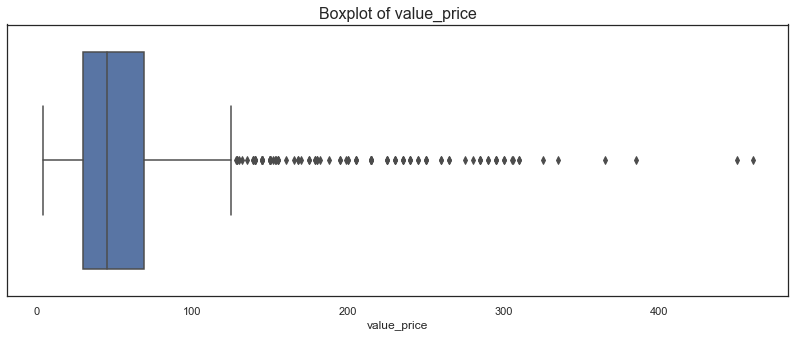

In [49]:
# Plot outliers in 'value_price'
plt.figure(figsize=(14,5))
sns.boxplot(df['value_price'])

# Add title
plt.title('Boxplot of value_price', fontsize=16)

In [50]:
# Compute the IQR to identify outliers. IQR represents the inter-quartile range and given by Q3 – Q1.
# Data points which fall below Q1 – 3 IQR or above Q3 + 3 IQR are outliers, \
# where Q1 & Q3 are the 25th & 75th percentile of the dataset respectively.

percentile25 = df['value_price'].quantile(0.25)
percentile75 = df['value_price'].quantile(0.75)
iqr = percentile75 - percentile25

In [51]:
# Compute lower and upper limit
lower_limit = percentile25 - (3 * iqr)
upper_limit = percentile75 + (3 * iqr)

print(f'lower_limit is {lower_limit}, upper_limit is {upper_limit}')

lower_limit is -87.0, upper_limit is 186.0


In [52]:
# Display products < lower limit
below_lower_limit = df[df['value_price'] < lower_limit][['name', 'price_per_unit_vol', 'value_price', 'price_range'
                                                               ]].sort_values(by = 'value_price', ascending = False)
below_lower_limit

Empty DataFrame
Columns: [name, price_per_unit_vol, value_price, price_range]
Index: []

In [53]:
# Display products > upper limit
exceed_upper_limit = df[df['value_price'] > upper_limit][['name', 'price_per_unit_vol', 'value_price', 'price_range'
                                                               ]].sort_values(by = 'value_price', ascending = False)
exceed_upper_limit

name  \
647                                                   Orchidée Impériale The Cream   
1544                                           Elixir Vitae Serum Wrinkle Solution   
1447                                                        Ultimate Revival Cream   
908                                                         The Regenerating Serum   
655                                               Orchidée Impériale The Gel Cream   
1452                                                        Ultimate Revival Serum   
383                                                                    Night Serum   
393                                                              Brightening Serum   
1426                            Future Solution LX Intensive Firming Contour Serum   
1451                                                      Ultimate Revival Essence   
385                                             Darker Skin Tones Hyaluronic Serum   
392                                                                  Lifting Serum   
1546                                                Concentrated Brightening Serum   
1547                                                        Elixir Vitae Eye Serum   
1549                                                      Boosted Contouring Serum   
1204                                              Neuropeptide Firming Moisturizer   
503                                                      Phormula 3-9 Repair Cream   
1410                                   Future Solution LX Total Regenerating Cream   
920                                                  The Moisturizing Matte Lotion   
909                                                   The Moisturizing Soft Lotion   
65                                                TIME RESPONSE Skin Reserve Serum   
933                                        Younger® Pure Youth Serum with MIMIXYL™   
1436  Future Solution LX Total Protective Emulsion Broad Spectrum SPF 20 Sunscreen   
1415     Future Solution LX Total Protective Cream Broad Spectrum SPF 20 Sunscreen   
51                                                 TIME RESPONSE Eye Reserve Crème   
912                                                          The Lifting Eye Serum   
381                                                                  Calming Serum   
394                                                               Clarifying Serum   
54                                Youth Revolution Vitamin C Radiance Concentrator   
619                                             Crème Ancienne® Supreme Face Serum   
1443                                                  GenOptics Aura Essence Serum   
1205                                                      Neuropeptide Night Cream   
1499                                     Concentrated Ginseng Renewing Cream Light   
1493                                           Concentrated Ginseng Renewing Cream   
907                                                            The Eye Concentrate   
1442                                            R.N.A. POWER Anti-Aging Face Cream   
1102                                                      Rejuvenating Night Cream   
402                                              Darker Skin Tones Face Cream Rich   
379                                                                Face Cream Rich   
396                                                         Brightening Face Cream   
910                                                           The Eye Balm Intense   
1448                                                  GenOptics Spot Essence Serum   
1441                                    Future Solution LX Superior Radiance Serum   
648                                                  Abeille Royale Double R Serum   
398                                                   Darker Skin Tones Face Cream   
376                                                                     Face Cream   
386                                 

In [54]:
# Drop outliers 
df.drop(exceed_upper_limit.index, axis = 0, inplace = True)

In [55]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [56]:
# Update'price_range'
df['price_range'] = pd.qcut(df['value_price'], q=3, labels = ['1', '2', '3'], duplicates ='raise', precision =3)

# Reference: {'1': 'cheap', '2': 'average', '3': 'expensive'}

In [57]:
# Check value_counts
df['price_range'].value_counts().sort_index()

1    542
2    490
3    516
Name: price_range, dtype: int64

In [58]:
# Check range of classes
pd.qcut(df['value_price'], q=3).value_counts()

(3.9490000000000003, 35.0]    542
(57.333, 182.0]               516
(35.0, 57.333]                490
Name: value_price, dtype: int64

In [59]:
# Compute lower and upper limit for updated 'price_range'
lower_limit = percentile25 - (3 * iqr)
upper_limit = percentile75 + (3 * iqr)

print(f'lower_limit is {lower_limit}, upper_limit is {upper_limit}')

lower_limit is -87.0, upper_limit is 186.0


In [60]:
# Display the summary statistics
df['value_price'].describe()

count    1548.000000
mean       50.475200
std        31.147867
min         3.950000
25%        29.000000
50%        42.500000
75%        65.000000
max       182.000000
Name: value_price, dtype: float64

In [61]:
# Display the summary statistics
df.groupby('price_range')['value_price'].describe()

count       mean        std    min   25%   50%   75%    max
price_range                                                             
1            542.0  22.839686   8.796755   3.95  16.0  25.0  30.0   35.0
2            490.0  44.358163   5.957740  36.00  39.0  44.0  49.0   57.0
3            516.0  85.312016  27.276747  58.00  65.0  75.0  95.0  182.0

## 3.4. Correlation Heatmap of Numeric Features (After Initial Proprocessing)

We will plot a heatmap again but with the new transformed data to check the collinearity between the features. Pairwise correlation allows us to detect highly correlated features which bring no new information to the dataset. Since these features only add to model complexity, increase the chance of overfitting, and require more computations, the feature that has a lower correlation coefficient with the target should be dropped.

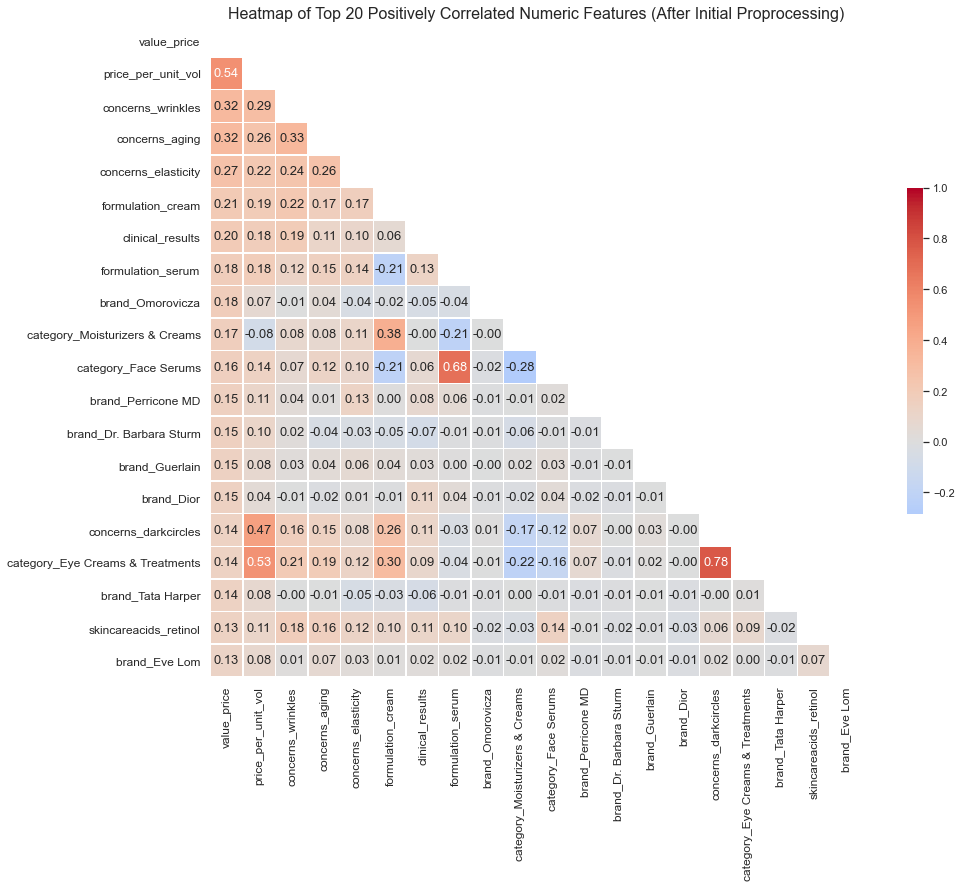

In [62]:
# Set style
sns.set_theme(style='white')

# Correlation matrix for dataset
df_corr = df.corr()

# Create variable for top k positively correlated features
k = 20 # number of variables for heatmap
top_df_corr_features = df_corr.nlargest(k, 'value_price')['value_price'].index

# Compute correlation matrix for top k features
top_df_corr = df[top_df_corr_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(top_df_corr, dtype=bool))

# Set up the matplotlib figure size
plt.figure(figsize=(16,12))

# Draw heatmap with the mask and correct aspect ratio
sns.heatmap(top_df_corr, mask=mask, cmap='coolwarm', center=0, square=True, linewidths=.5, annot =True, fmt='.2f', vmax=1.00, cbar_kws={"shrink": .5}, annot_kws={"size":13})

# Add title and axis labels
plt.title('Heatmap of Top 20 Positively Correlated Numeric Features (After Initial Proprocessing)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save plot
plt.savefig('../plots/heatmap_after.png', dpi=150, bbox_inches='tight')

In [63]:
# Create a function to select highly correlated features to consider elimination 
def correlation(dataframe, threshold) :
    col_corr = set()   # set of all the names of the correlated columns
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)) :
        for j in range (i) :
            if (corr_matrix.iloc[i, j]) > threshold :    
                colname = corr_matrix.columns[i]    # get the name of the column
                col_corr.add(colname)
    return col_corr

In [64]:
# Display full correlation matrix
df_corr

id  value_price  av_rating  \
id                                   1.000000    -0.033605  -0.017133   
value_price                         -0.033605     1.000000   0.041872   
av_rating                           -0.017133     0.041872   1.000000   
sum_reviews                         -0.168064    -0.120245   0.093466   
sum_love                            -0.098970    -0.155799   0.058320   
skintype_sensitive                  -0.082692    -0.020315   0.053411   
skintype_combination                 0.248252     0.075053   0.042510   
skintype_normal                      0.213396     0.118334   0.014857   
skintype_dry                         0.183179     0.053000   0.019352   
skintype_oily                        0.297914     0.003732   0.025784   
concerns_dryness                     0.132180     0.037419   0.031433   
concerns_dullness                    0.159255     0.120394   0.022652   
concerns_elasticity                  0.052179     0.270833  -0.029148   
concerns_darkspots                   0.081301     0.005624   0.024087   
concerns_darkcircles                -0.049270     0.140738  -0.103136   
concerns_puffiness                  -0.055352     0.115547  -0.130609   
concerns_pores                       0.063396    -0.098183   0.068616   
concerns_wrinkles                    0.062858     0.322078  -0.036445   
concerns_aging                      -0.047313     0.316024  -0.044652   
concerns_redness                     0.103010     0.005824   0.072879   
concerns_oiliness                    0.193655    -0.085862  -0.025470   
concerns_acne                        0.007670    -0.100199   0.048104   
concerns_others                     -0.234152    -0.079284   0.002638   
pref_vegan                           0.256596    -0.122727   0.026842   
pref_crueltyfree                     0.294235    -0.097402   0.012538   
pref_glutenfree                      0.237014    -0.083368   0.040334   
pref_antioxidant                     0.095363     0.042529   0.012484   
pref_hydration                       0.117963    -0.006167   0.038439   
skincareacids_hyaluronicacid         0.115948     0.046874  -0.029730   
skincareacids_salicylicacid          0.029074    -0.085630   0.009922   
skincareacids_AHA                    0.088529     0.005538   0.090717   
skincareacids_vitaminc              -0.021050    -0.019984  -0.006631   
skincareacids_retinol               -0.011880     0.132949   0.006233   
excluded_parabens                    0.143607    -0.003815   0.031408   
excluded_sulfates                    0.140881     0.086095   0.101967   
excluded_formaldehydes               0.205122    -0.020942   0.053725   
excluded_phthalates                  0.134054     0.031900   0.031009   
excluded_silicones                  -0.017379    -0.065176   0.004503   
formulation_cream                    0.026392     0.208133  -0.069611   
formulation_serum                    0.105436     0.180430   0.033164   
formulation_liquid                   0.136619    -0.068402  -0.017176   
formulation_gel                      0.095522    -0.055488  -0.004109   
formulation_mask                     0.032781    -0.063428   0.073289   
formulation_spray                   -0.041118    -0.073221  -0.000210   
formulation_balm                    -0.067610    -0.113216  -0.007916   
award_allure                        -0.021619    -0.019224   0.020179   
clinical_results                     0.007505     0.199268  -0.022195   
size_ml                             -0.061040    -0.201014   0.082001   
price_per_unit_vol                  -0.021596     0.538764  -0.079768   
brand_AMOREPACIFIC                  -0.095092     0.083394   0.002638   
brand_Algenist                      -0.063682     0.072869   0.017988   
brand_Alpha-H                        0.053427     0.049836   0.046454   
brand_Anastasia Beverly Hills        0.020697    -0.004471   0.034554   
brand_Armani Beauty                  0.006948     0.003695   0.013961   
brand_BECCA                 

In [65]:
# Display number of highly correlated features
corr_features = correlation(df, 0.8)
len(set(corr_features))

1

In [66]:
# Display highly correlated features 
corr_features

{'category_Masks'}

'category_Masks' and 'formulation_mask' have high pair-wise correlation of > 0.8. We will drop one of the pair (i.e. 'formulation_mask').

In [67]:
# Dropping features with high pairwise correlation 
df = df.drop(['formulation_mask'], axis=1)

## 3.5. Correlation Heatmap of Numeric Features (After Initial Proprocessing)

From the EDA earlier, we noted features with low variance. Features without much variance or variability in the data will provide little information to an model for learning the patterns. Hence, we will seek to remove such features.

In [68]:
# Filter for features with low variance
var_list = df.var()
low_var_list = var_list[var_list.values<0.001]   # threshold of 0.001 is used
low_var_list.sort_values()

skincareacids_vitaminc           0.000646
brand_COVER FX                   0.000646
brand_Flora + Bast               0.000646
brand_Lab Series For Men         0.000646
brand_bareMinerals               0.000646
brand_TOM FORD                   0.000646
brand_Skin Inc Supplement Bar    0.000646
brand_NuFACE                     0.000646
brand_NARS                       0.000646
brand_Isle of Paradise           0.000646
brand_High Beauty                0.000646
brand_Cinema Secrets             0.000646
brand_Ciaté London               0.000646
brand_BECCA                      0.000646
brand_Armani Beauty              0.000646
brand_Anastasia Beverly Hills    0.000646
brand_rms beauty                 0.000646
brand_LASHFOOD                   0.000646
brand_MAELYS Cosmetics           0.000646
brand_lululemon selfcare         0.000646
dtype: float64

In [69]:
# Display features with low variance
low_var_drop_list = [item for item in low_var_list.index]
low_var_drop_list

['skincareacids_vitaminc',
 'brand_Anastasia Beverly Hills',
 'brand_Armani Beauty',
 'brand_BECCA',
 'brand_COVER FX',
 'brand_Ciaté London',
 'brand_Cinema Secrets',
 'brand_Flora + Bast',
 'brand_High Beauty',
 'brand_Isle of Paradise',
 'brand_LASHFOOD',
 'brand_Lab Series For Men',
 'brand_MAELYS Cosmetics',
 'brand_NARS',
 'brand_NuFACE',
 'brand_Skin Inc Supplement Bar',
 'brand_TOM FORD',
 'brand_bareMinerals',
 'brand_lululemon selfcare',
 'brand_rms beauty']

In [70]:
# Dropping features with low variance
df = df.drop(low_var_drop_list, axis=1)

In [71]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [72]:
# Save data
df.to_csv('../data/sephora_clean_eda.csv', index = False)